In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install plotly
from PIL import Image
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glacierml as gl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

tf.random.set_seed(42)


print('currently running tensorflow version: ' + tf.__version__)

# RGI.to_csv('Farinotti_mean_thickness_RGI_ID.csv')


currently running tensorflow version: 2.8.0


In [4]:
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
# ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()




RGI = gl.RGI_loader()

RGI = RGI[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax',
    'region'
]]
for region_number in tqdm(range(1,20,1)):
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
    if region_number != 19:
        drops = RGI[
            ((RGI['region'] == str(region_number)) & (RGI['Zmin'] < 0)) |
            ((RGI['region'] == str(region_number)) & (RGI['Zmed'] < 0)) |
            ((RGI['region'] == str(region_number)) & (RGI['Zmax'] < 0)) |
            ((RGI['region'] == str(region_number)) & (RGI['Slope'] < 0)) |
            ((RGI['region'] == str(region_number)) & (RGI['Aspect'] < 0))
        ].index
    RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
RGI

ref = pd.merge(ref, RGI, on = 'RGIId')
ref

100%|██████████| 19/19 [00:01<00:00, 15.49it/s]


RGIId  Farinotti Mean Thickness   CenLat    CenLon  Slope  \
0       RGI60-01.00001                 21.182035  63.6890 -146.8230   42.0   
1       RGI60-01.00002                 30.519478  63.4040 -146.6680   16.0   
2       RGI60-01.00003                 35.518610  63.3760 -146.0800   18.0   
3       RGI60-01.00004                 53.077263  63.3810 -146.1200   19.0   
4       RGI60-01.00005                 47.519207  63.5510 -147.0570   16.0   
...                ...                       ...      ...       ...    ...   
215482  RGI60-19.02748                 12.948014 -53.9860  -37.7325   29.9   
215483  RGI60-19.02749                 22.894110 -54.8310  -36.1361   23.6   
215484  RGI60-19.02750                 60.874610 -54.1884  -37.3018   16.8   
215485  RGI60-19.02751                 10.053704 -68.8656  -90.4266    0.4   
215486  RGI60-19.02752                 28.300531 -46.8972   37.7140    9.6   

        Zmin  Zmed  Zmax   Area  Aspect  Lmax region  Zdelta  
0       1936  2385  2725  0.360     346   839     01     789  
1       1713  2005  2144  0.558     162  1197     01     431  
2       1609  1868  2182  1.685     175  2106     01     573  
3       1273  1944  2317  3.681     195  4175     01    1044  
4       1494  1914  2317  2.573     181  2981     01     823  
...      ...   ...   ...    ...     ...   ...    ...     ...  
215482   310  -999   510  0.042     315   255     19     200  
215483   330  -999   830  0.567     200  1130     19     500  
215484    10  -999  1110  4.118     308  4329     19    1100  
215485   170  -999   270  0.011     122   106     19     100  
215486   970  -999  1170  0.528      35    -9     19     200  

[215487 rows x 13 columns]

  0%|          | 0/19 [00:00<?, ?it/s]2022-09-13 13:24:06.512362: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-13 13:24:06.512387: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-13 13:24:06.512678: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler fla

RGIId  Farinotti Mean Thickness   CenLat    CenLon  Slope  \
0       RGI60-01.00001                 21.182035  63.6890 -146.8230   42.0   
1       RGI60-01.00002                 30.519478  63.4040 -146.6680   16.0   
2       RGI60-01.00003                 35.518610  63.3760 -146.0800   18.0   
3       RGI60-01.00004                 53.077263  63.3810 -146.1200   19.0   
4       RGI60-01.00005                 47.519207  63.5510 -147.0570   16.0   
...                ...                       ...      ...       ...    ...   
215482  RGI60-19.02748                 12.948014 -53.9860  -37.7325   29.9   
215483  RGI60-19.02749                 22.894110 -54.8310  -36.1361   23.6   
215484  RGI60-19.02750                 60.874610 -54.1884  -37.3018   16.8   
215485  RGI60-19.02751                 10.053704 -68.8656  -90.4266    0.4   
215486  RGI60-19.02752                 28.300531 -46.8972   37.7140    9.6   

        Zmin  Zmed  Zmax   Area  Aspect  Lmax region  Zdelta  Edasi Thickness  \
0       1936  2385  2725  0.360     346   839     01     789      1358.728760   
1       1713  2005  2144  0.558     162  1197     01     431      1403.092163   
2       1609  1868  2182  1.685     175  2106     01     573      1421.256592   
3       1273  1944  2317  3.681     195  4175     01    1044      1370.667358   
4       1494  1914  2317  2.573     181  2981     01     823      1326.448242   
...      ...   ...   ...    ...     ...   ...    ...     ...              ...   
215482   310  -999   510  0.042     315   255     19     200              NaN   
215483   330  -999   830  0.567     200  1130     19     500              NaN   
215484    10  -999  1110  4.118     308  4329     19    1100              NaN   
215485   170  -999   270  0.011     122   106     19     100              NaN   
215486   970  -999  1170  0.528      35    -9     19     200              NaN   

            VE - VF    VE / VF  
0       1337.546725  64.145336  
1       1372.572685  45.973662  
2       1385.737982  40.014420  
3       1317.590095  25.824002  
4       1278.929035  27.913939  
...             ...        ...  
215482          NaN        NaN  
215483          NaN        NaN  
215484          NaN        NaN  
215485          NaN        NaN  
215486          NaN        NaN  

[215487 rows x 16 columns]

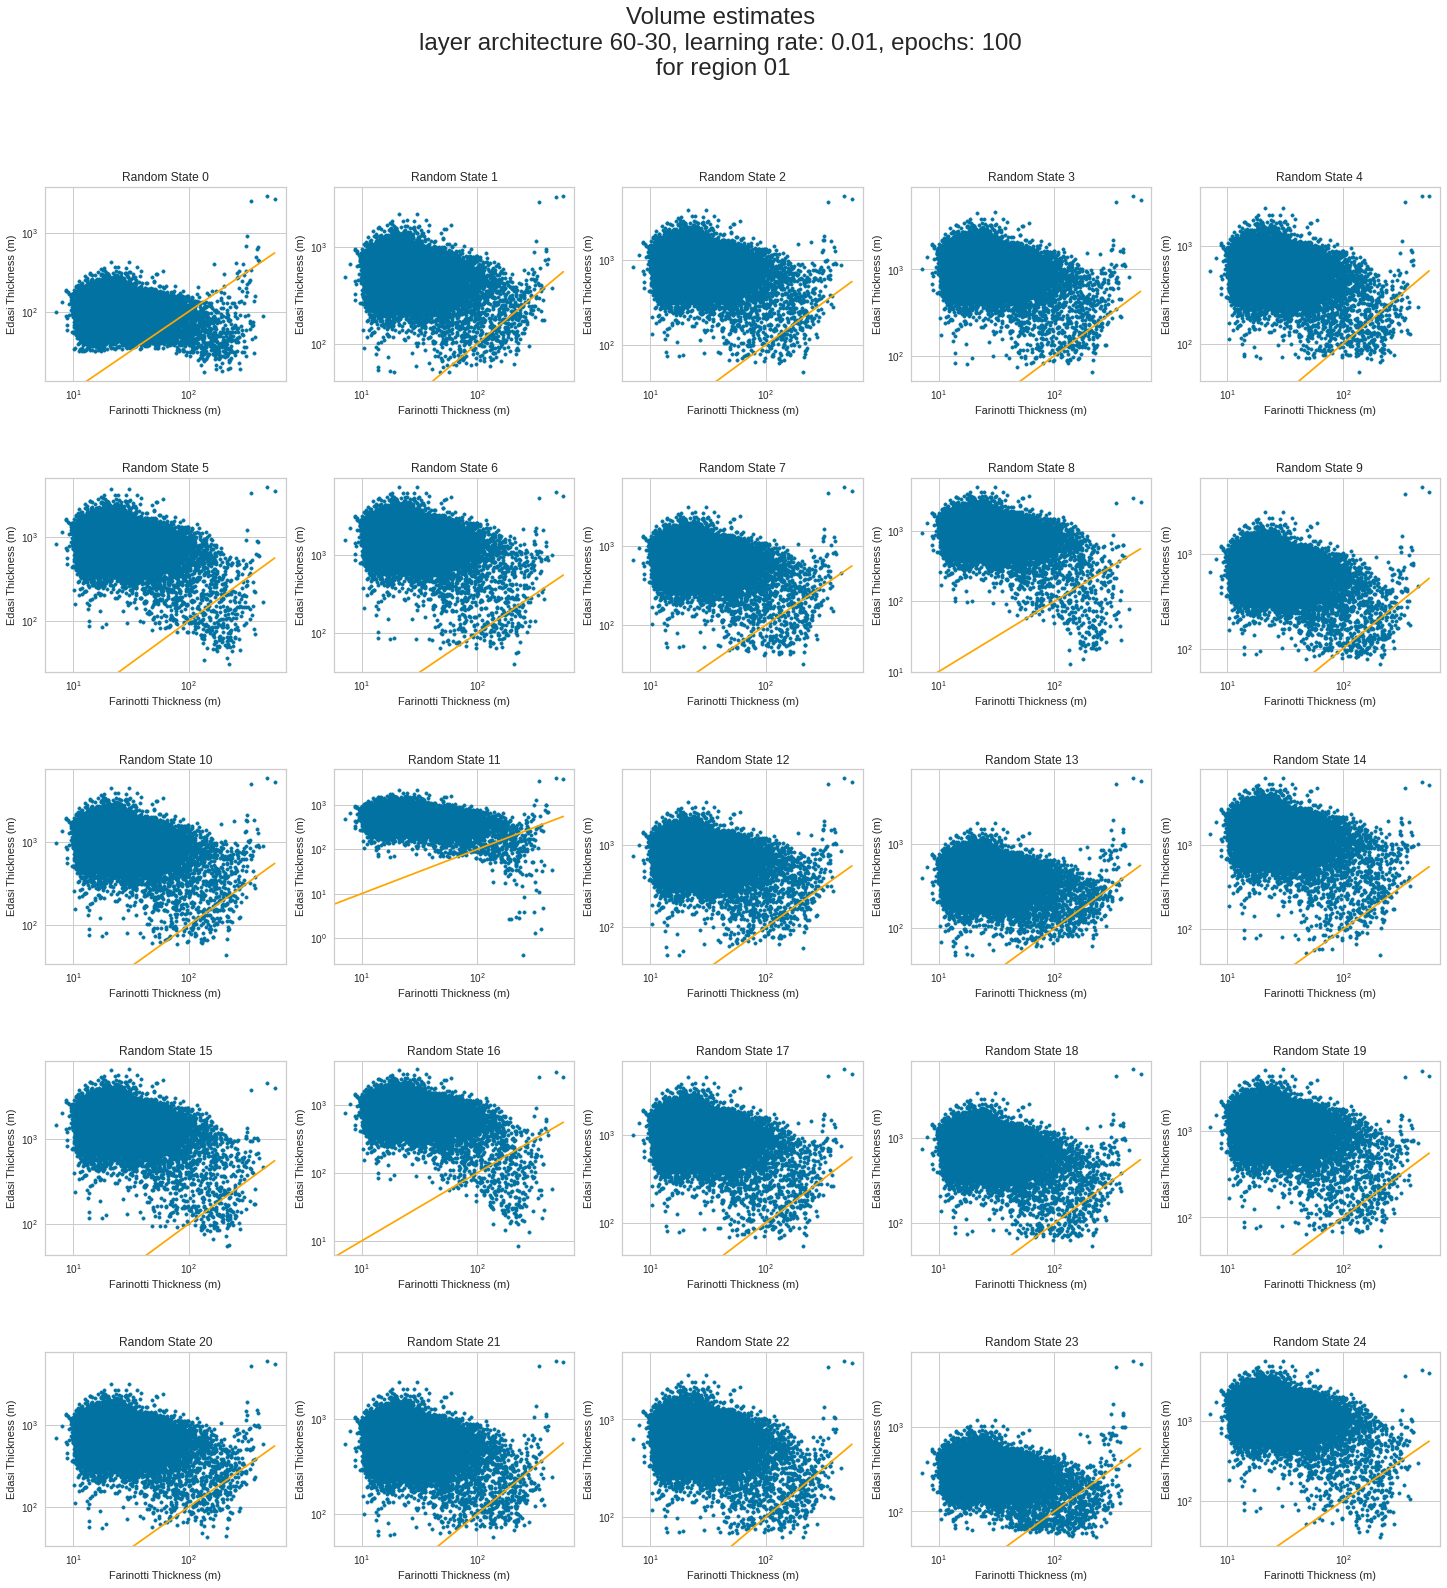

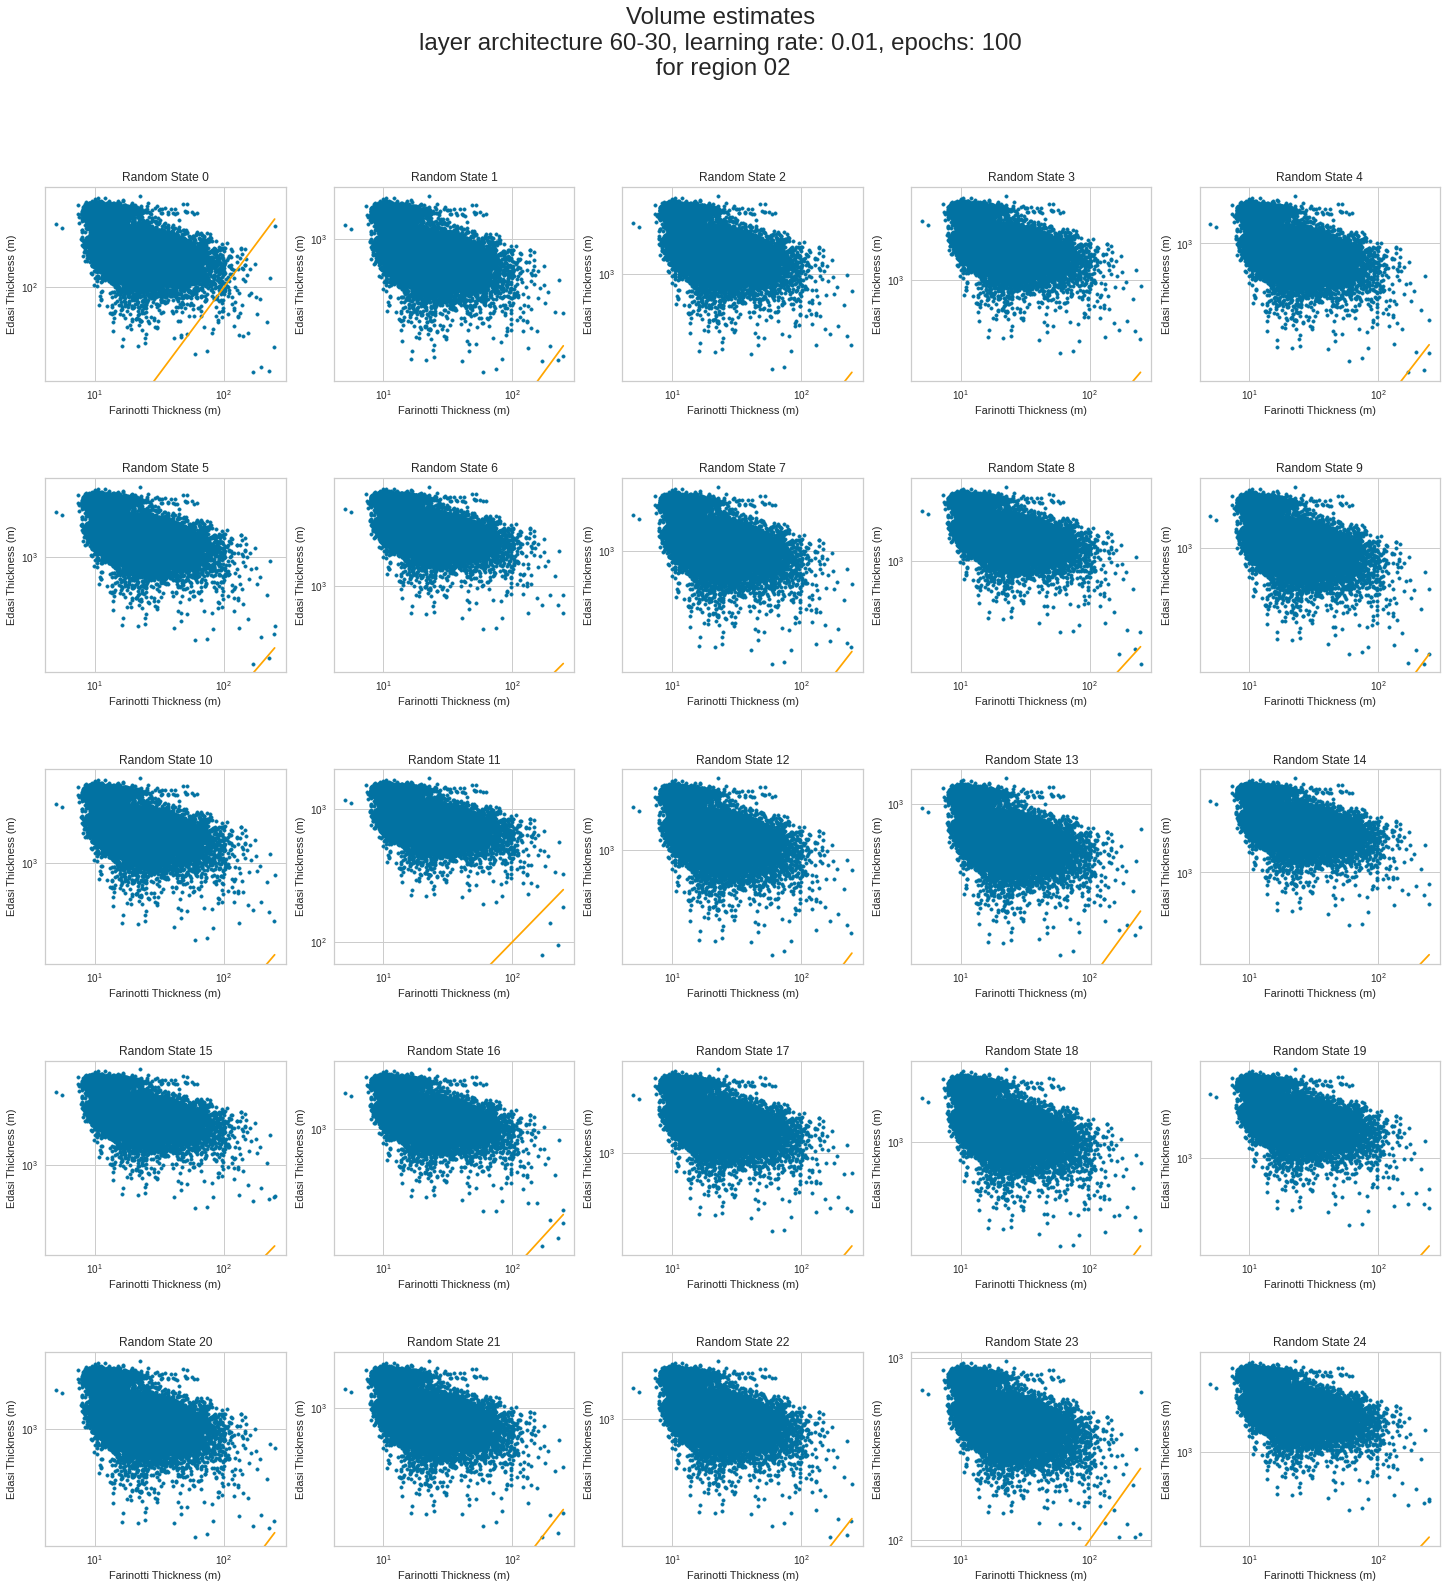

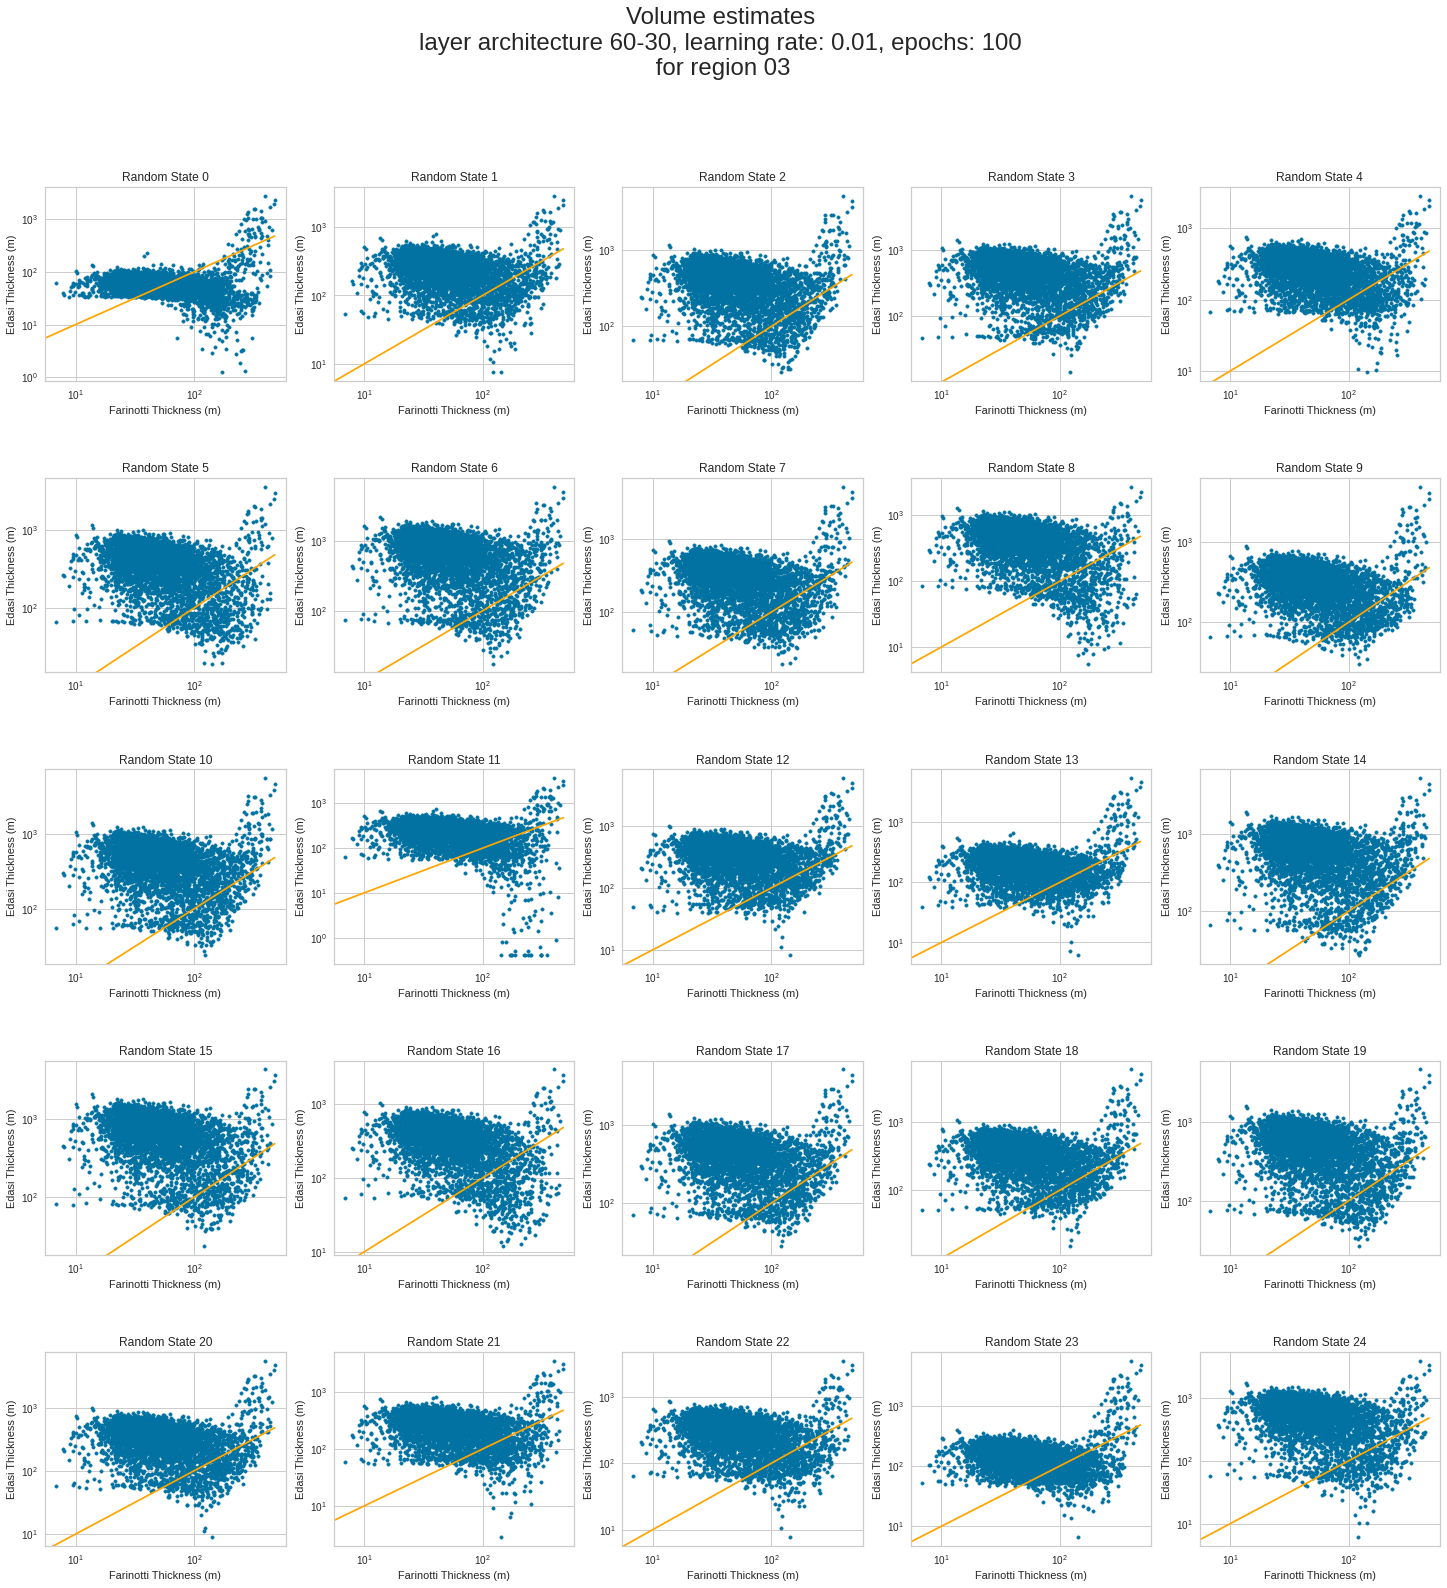

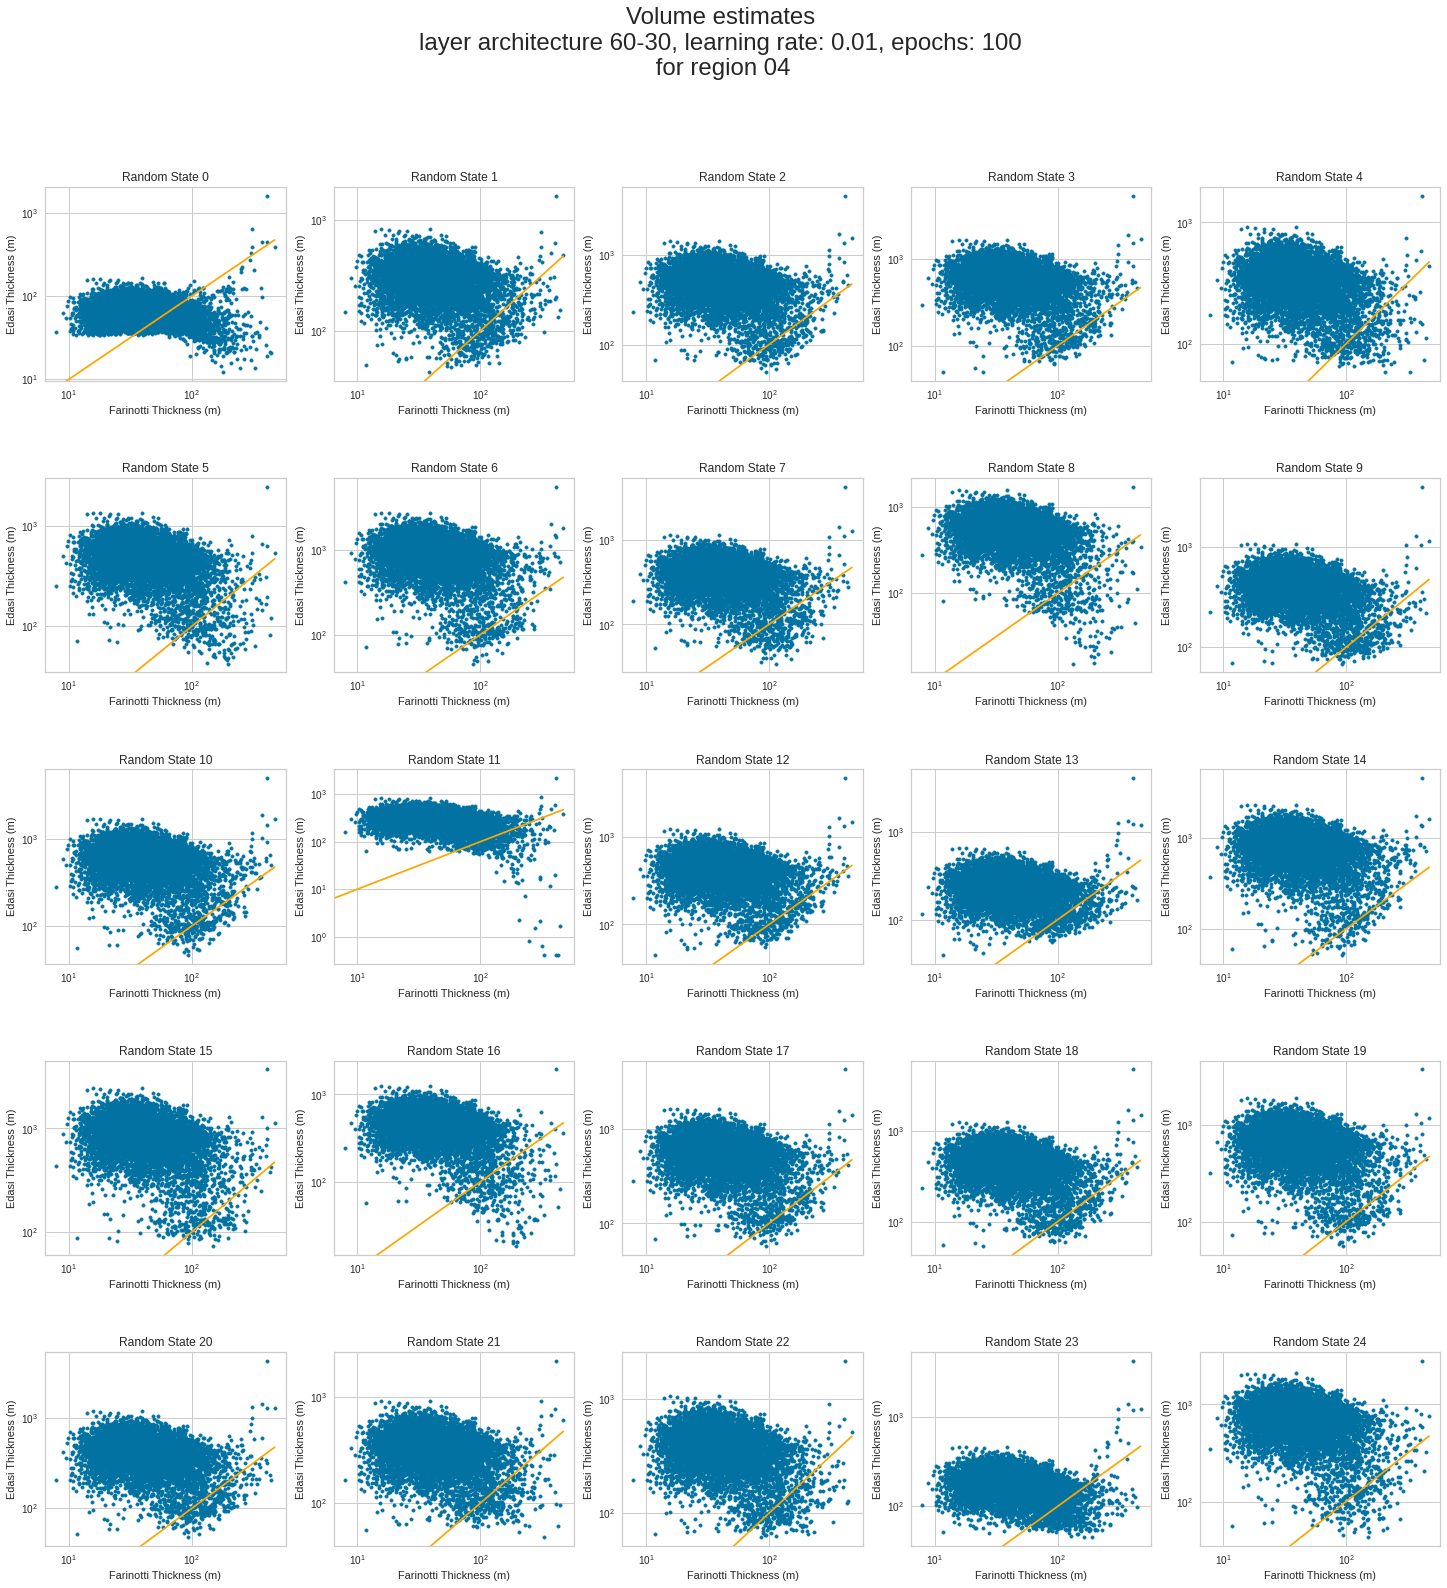

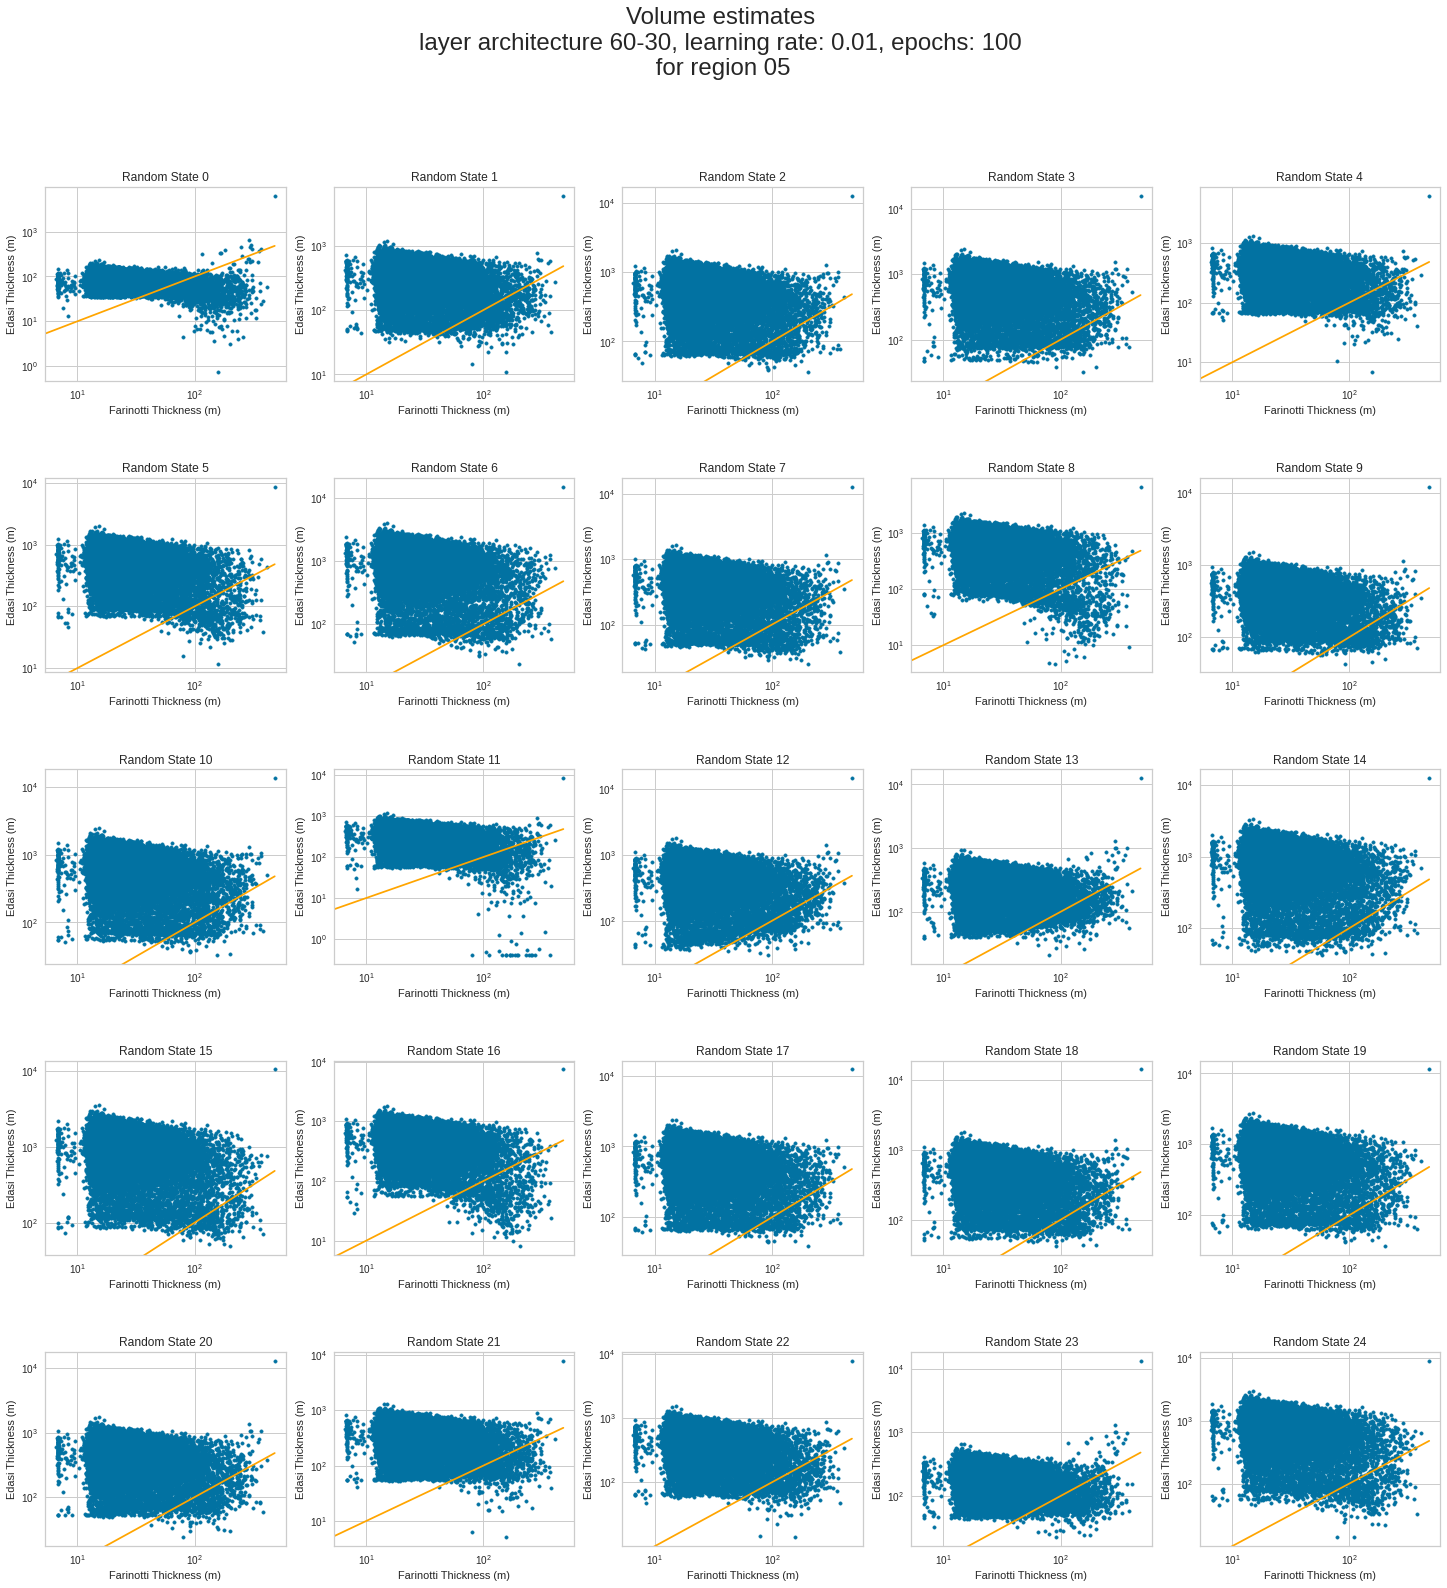

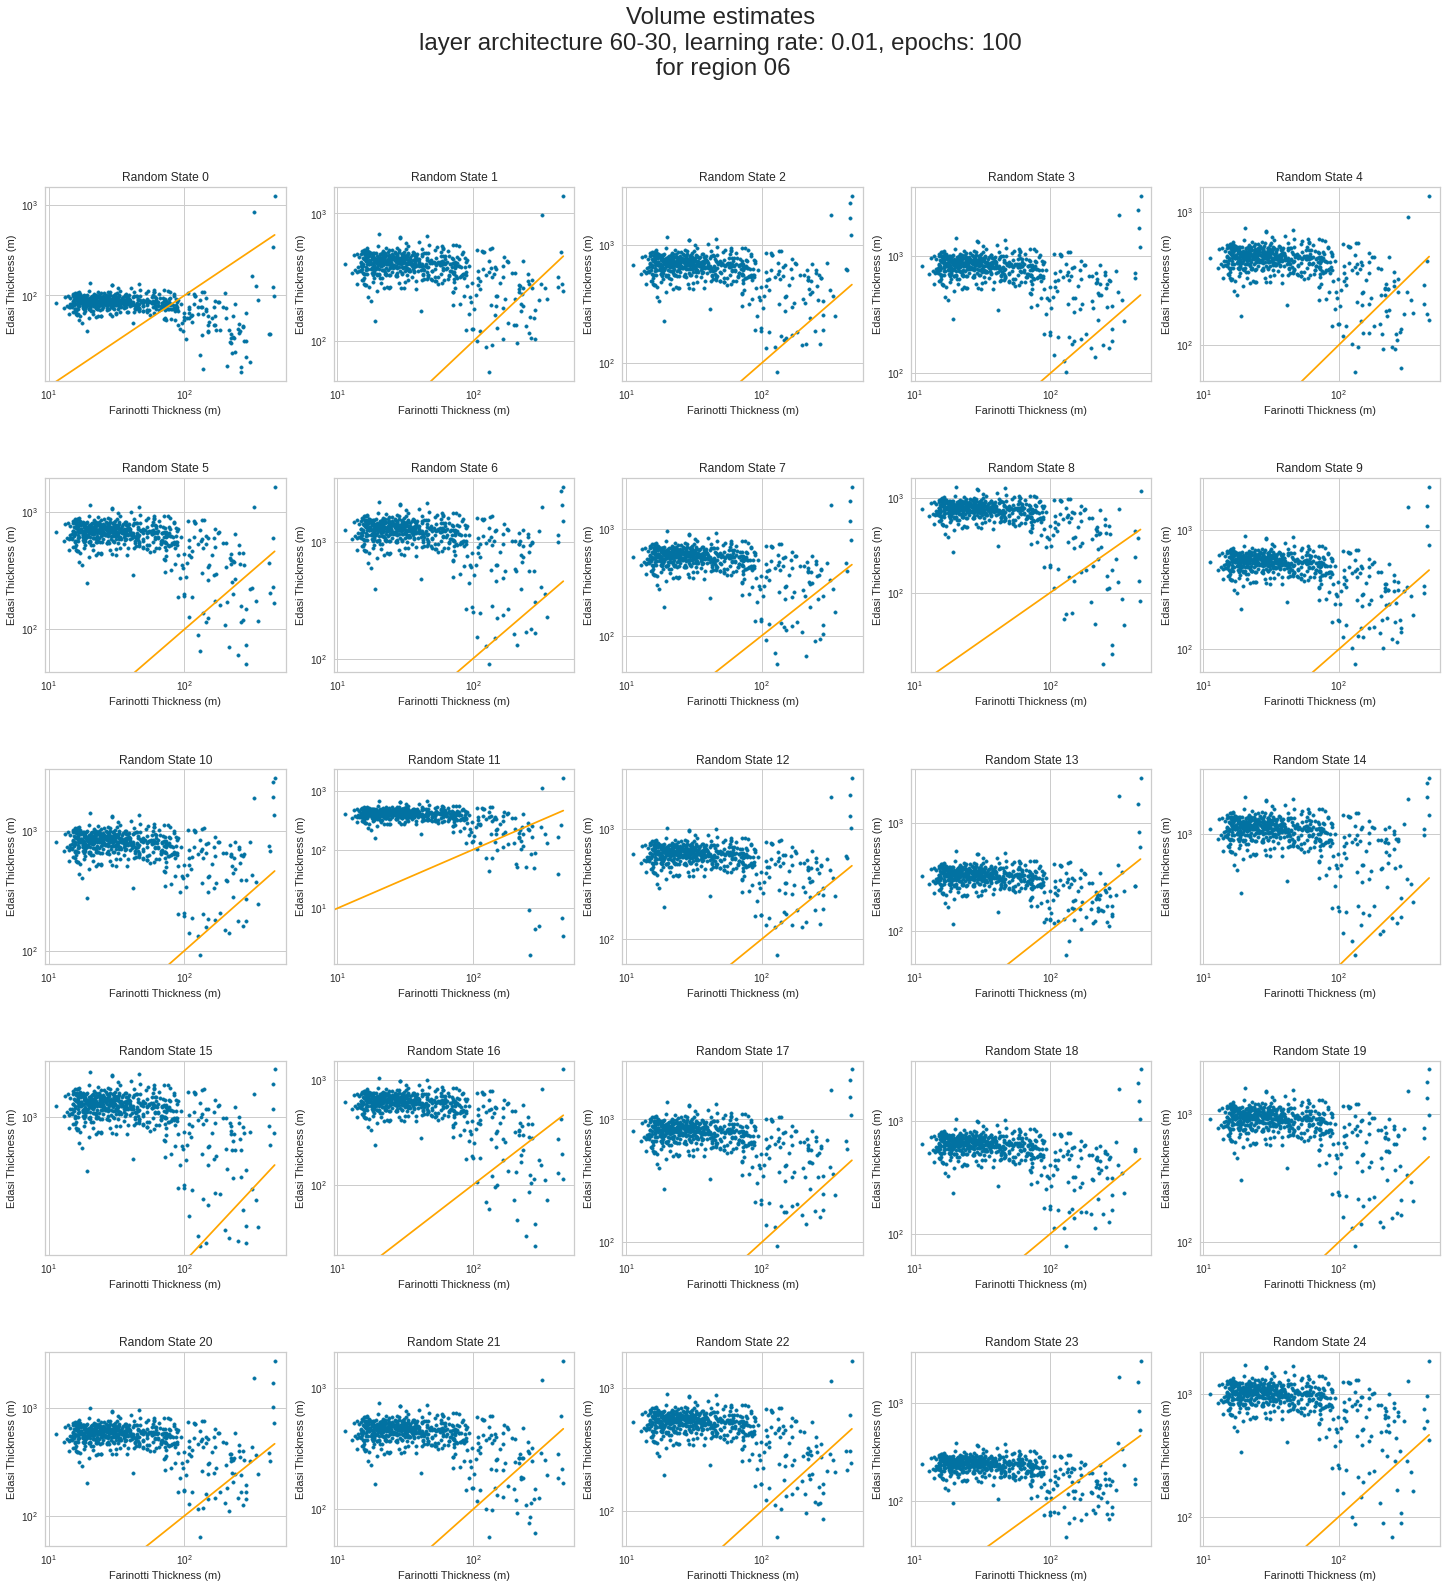

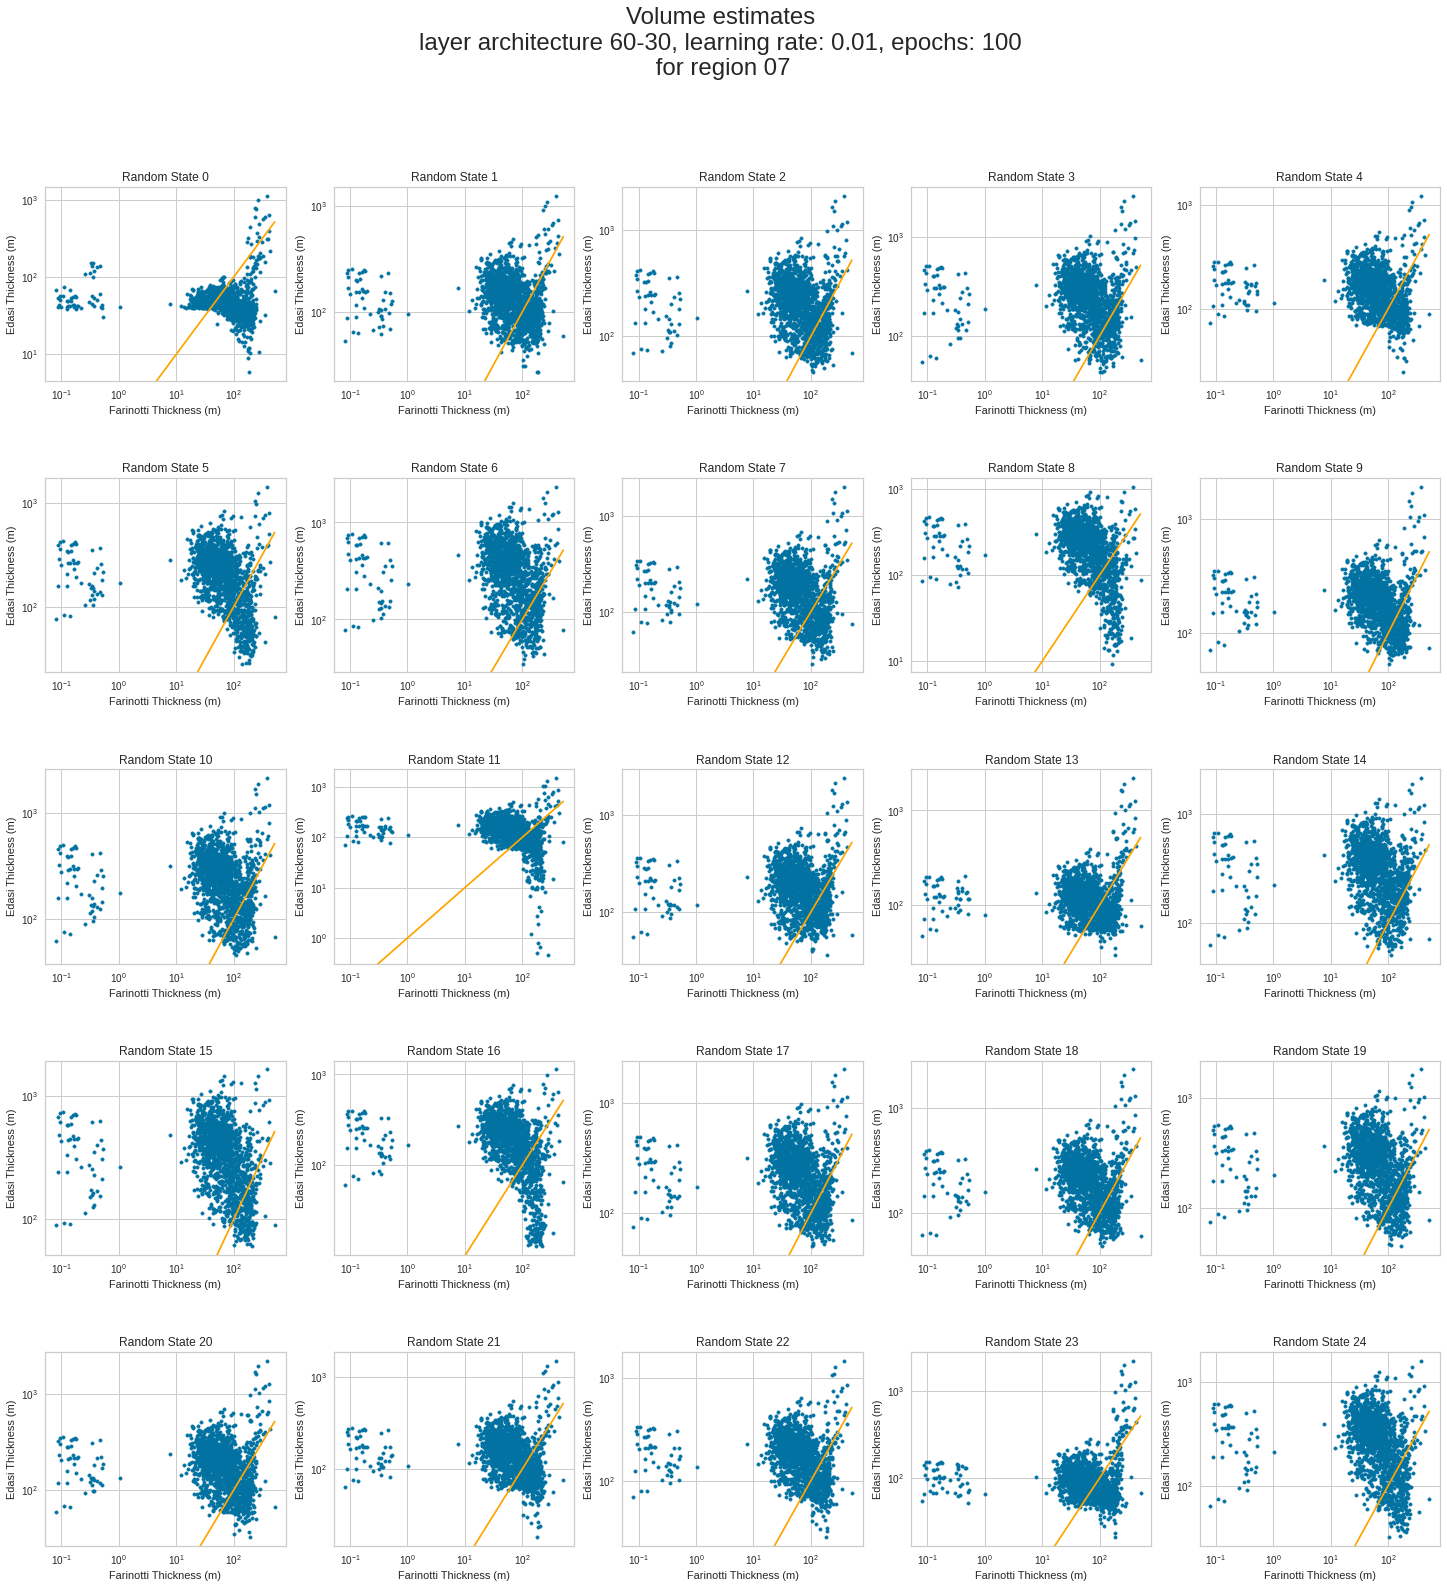

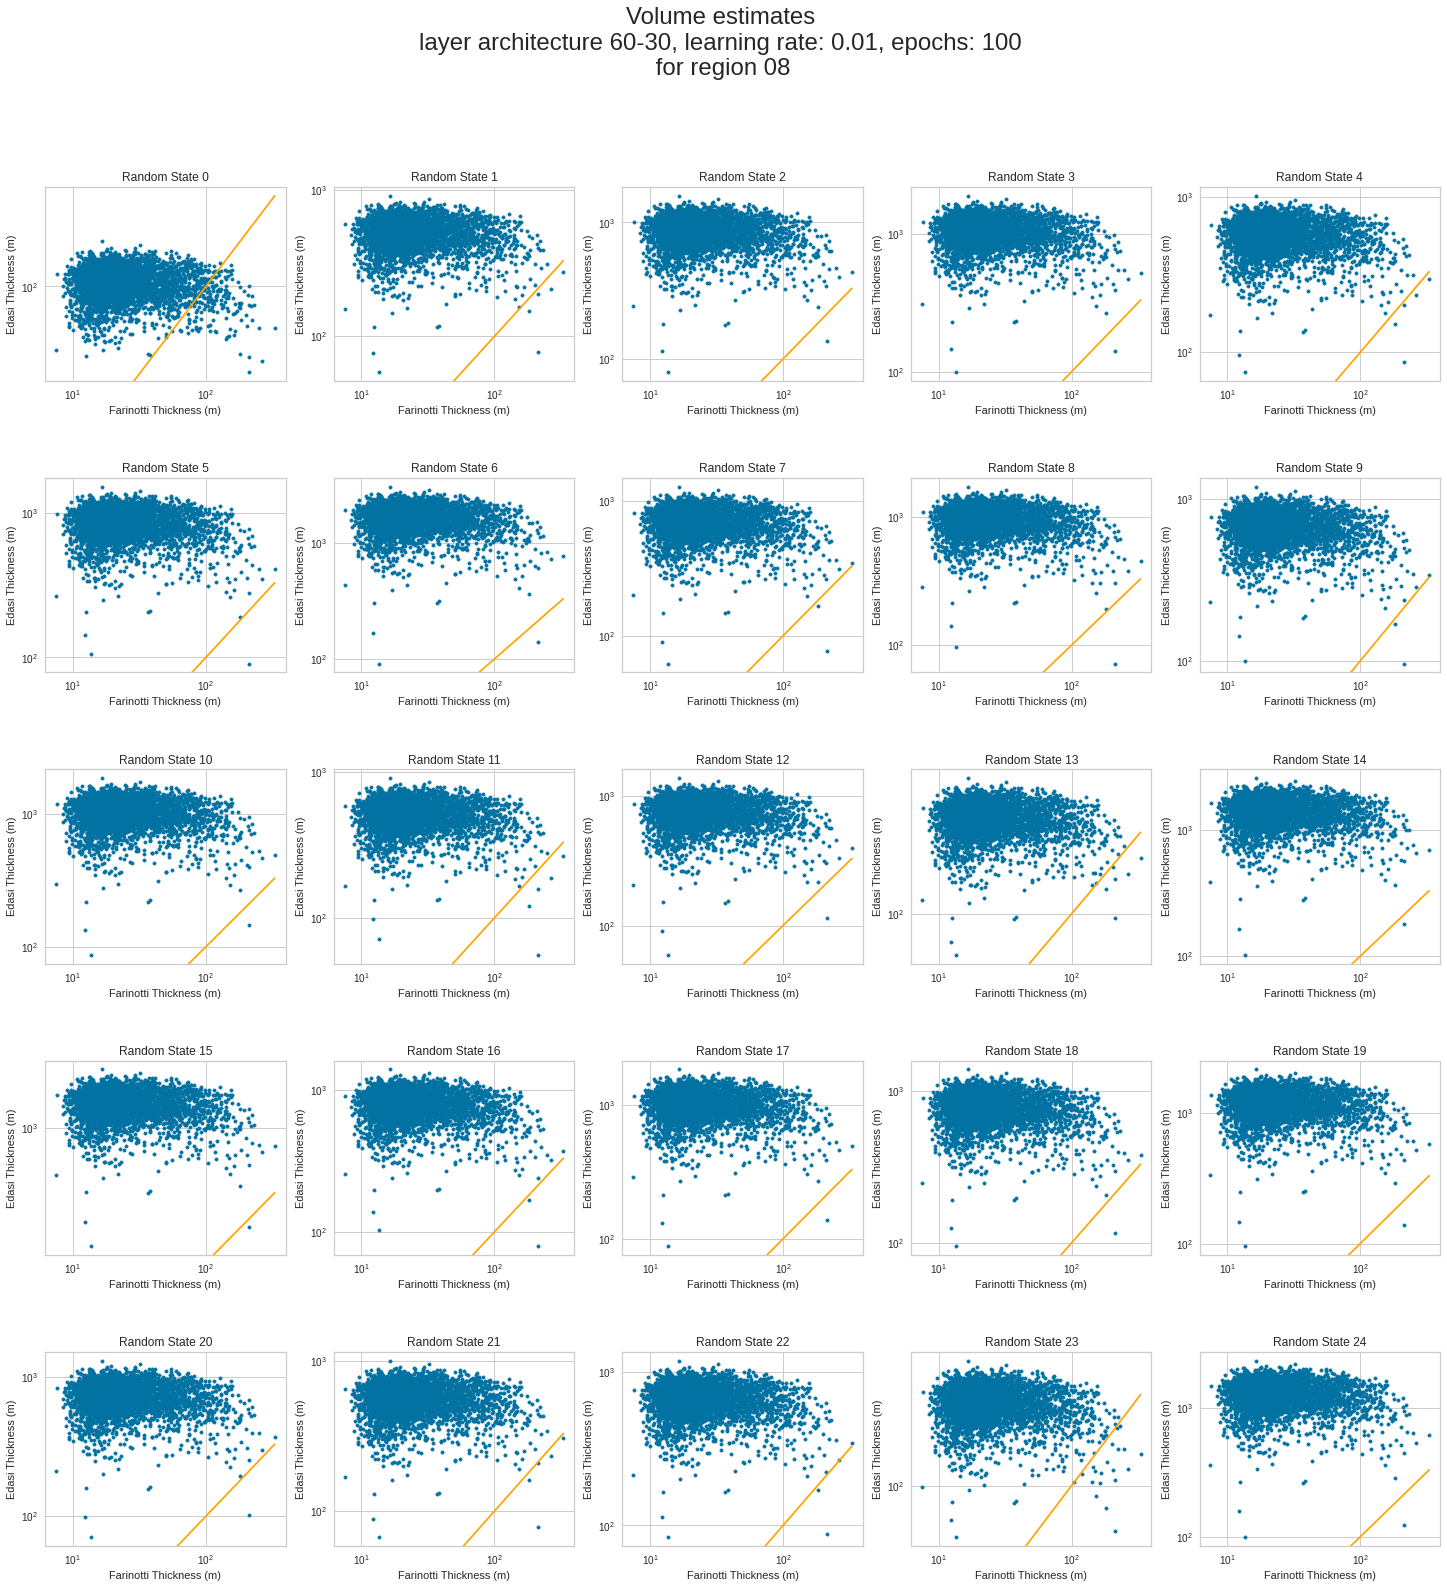

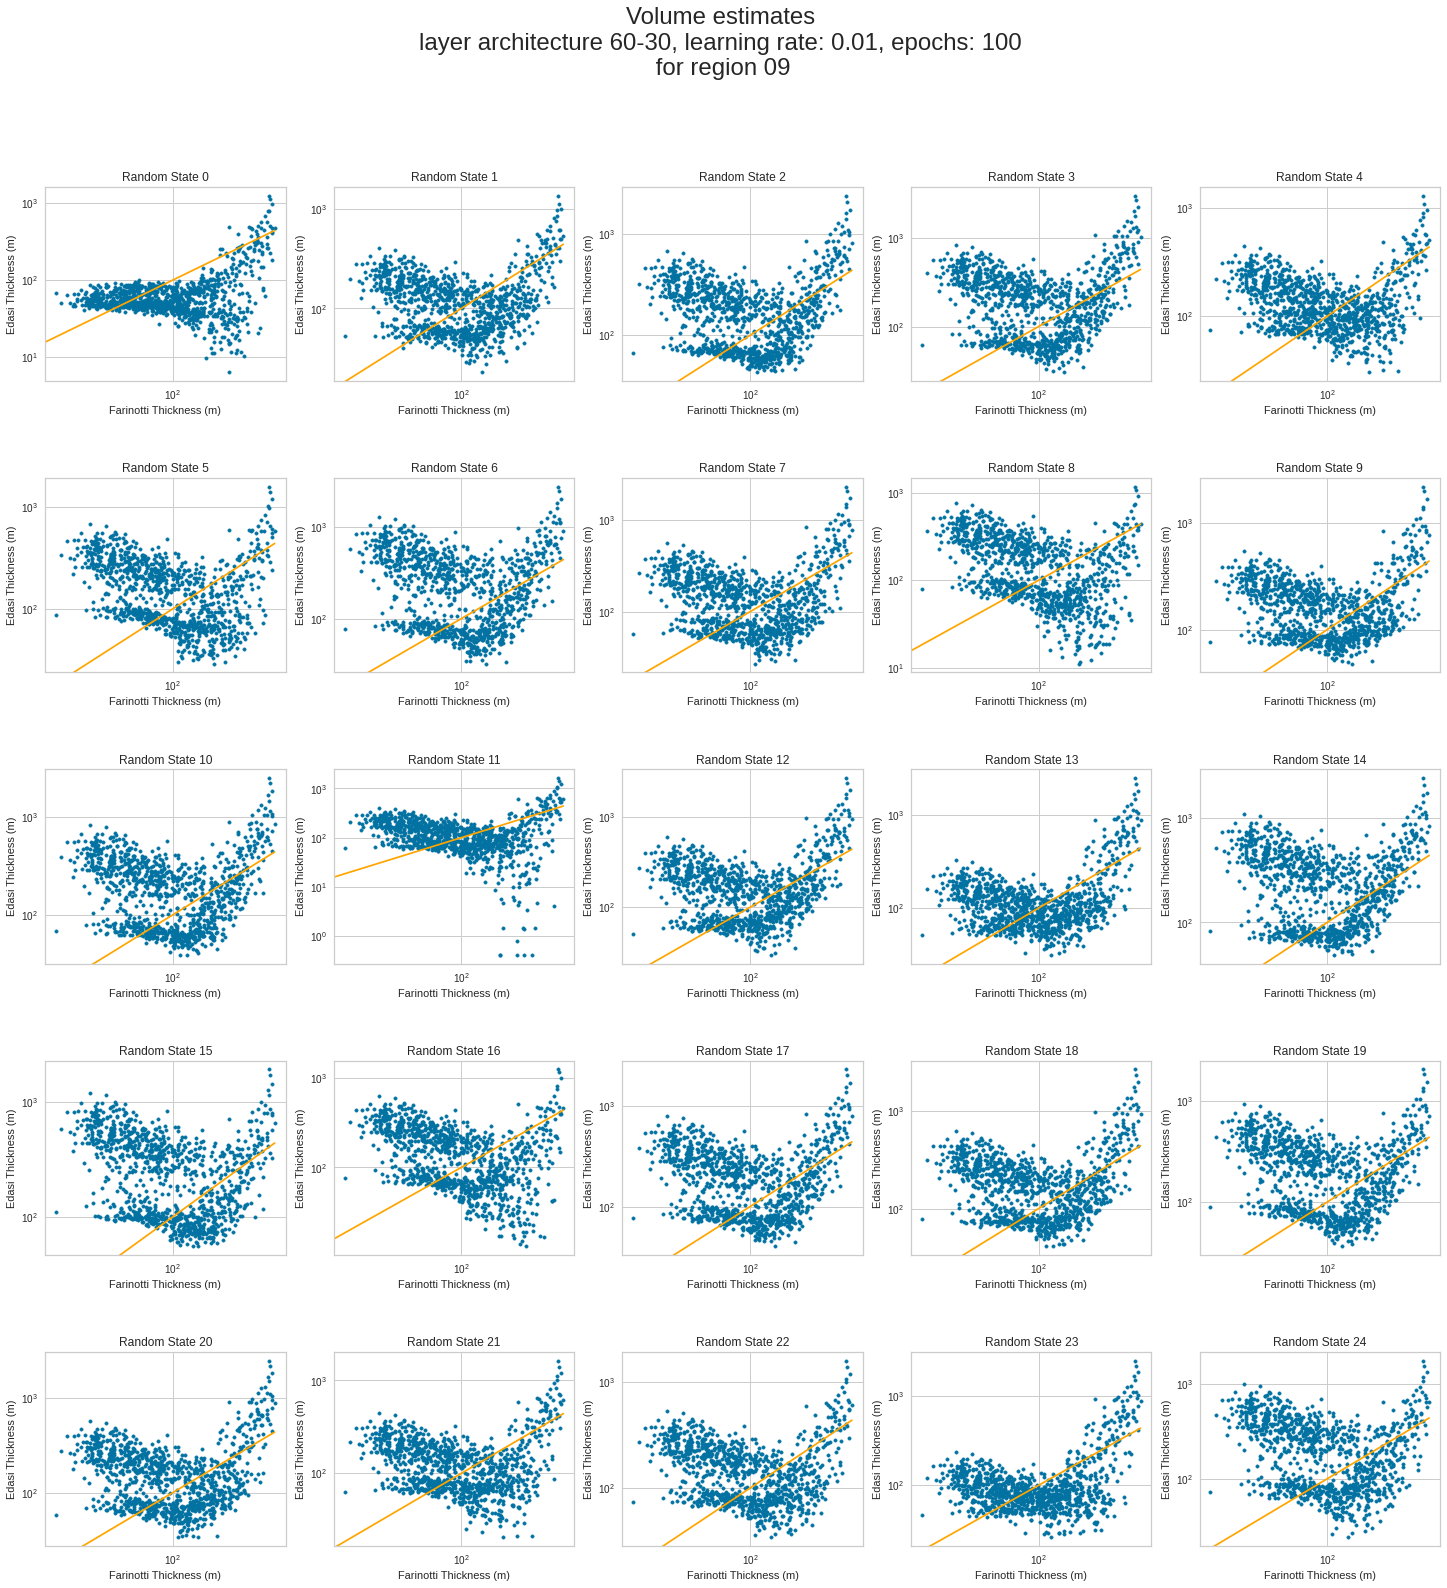

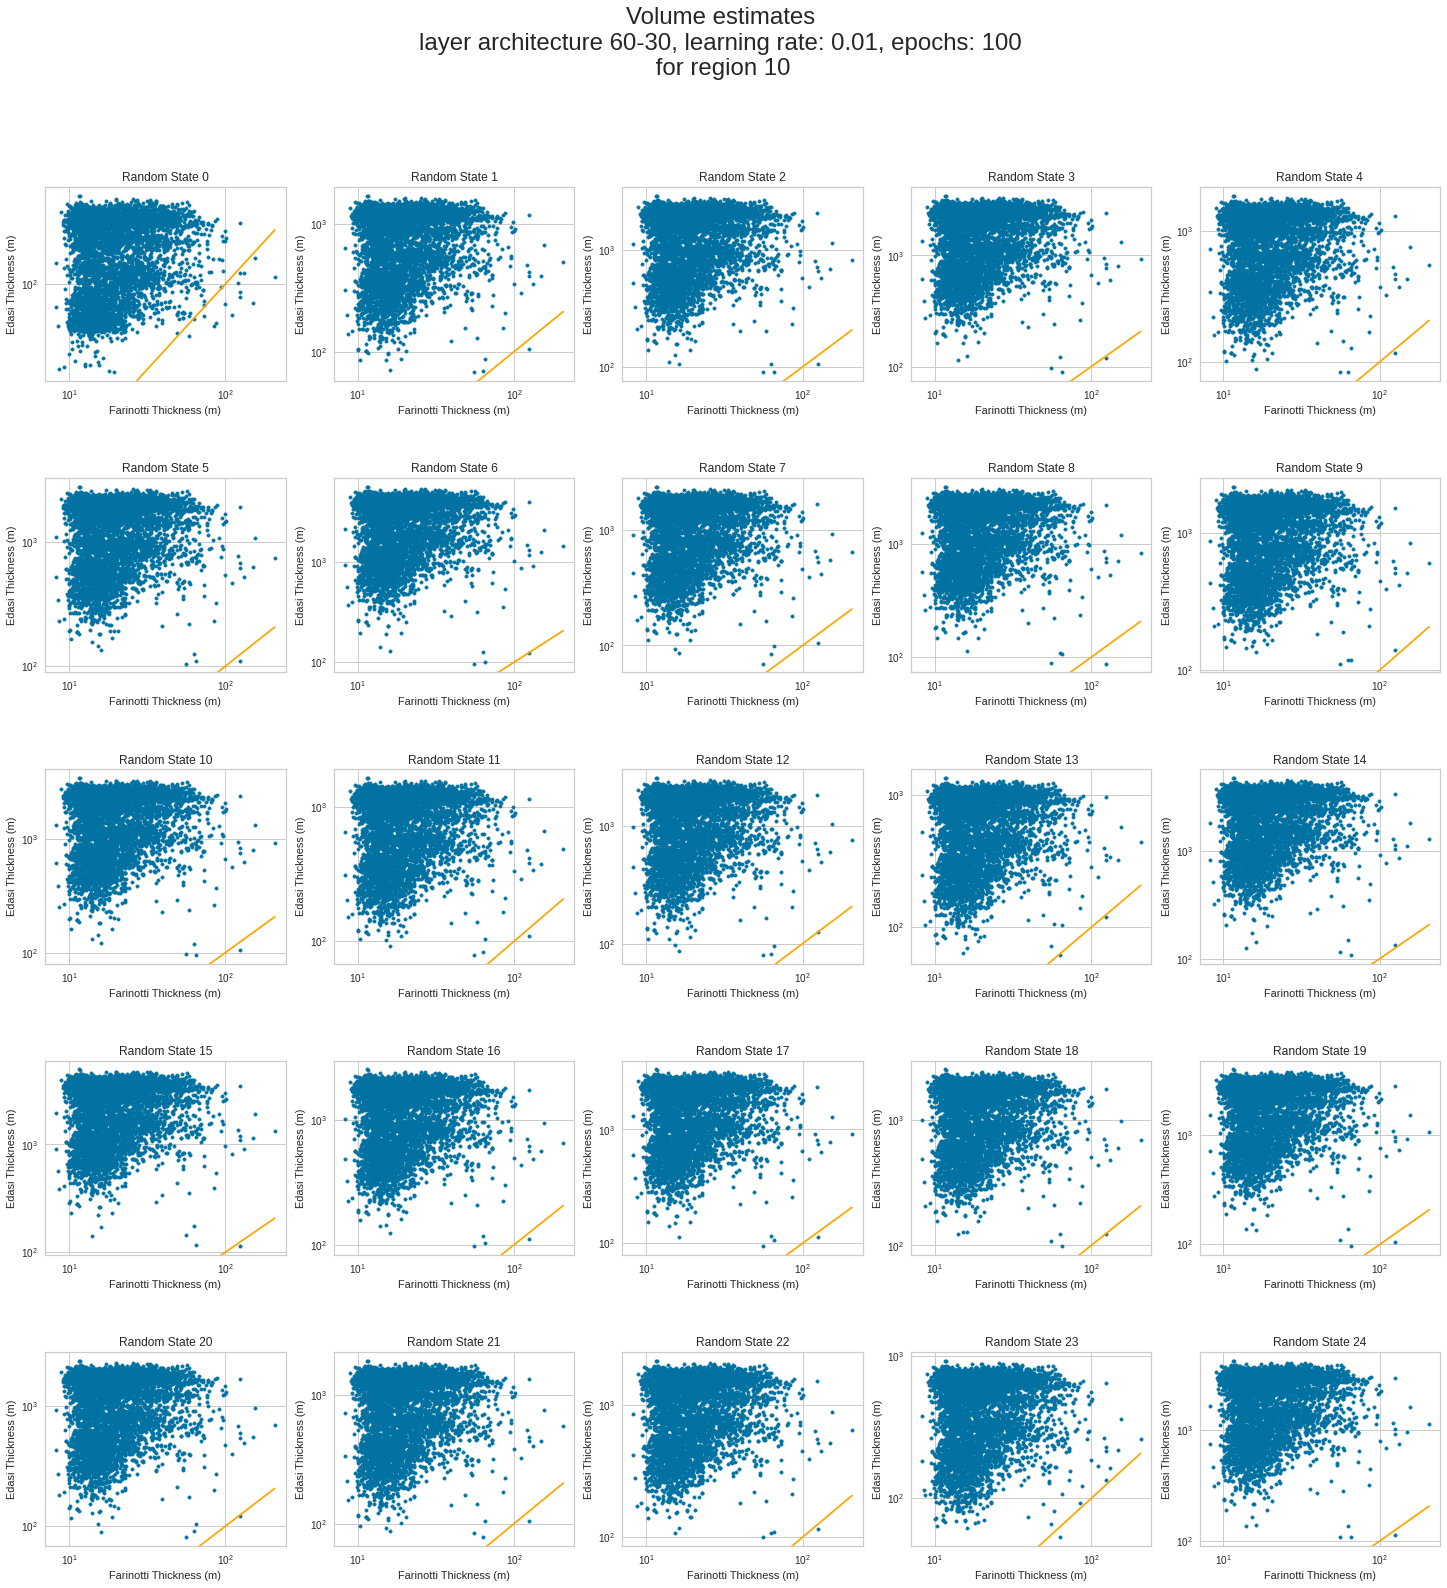

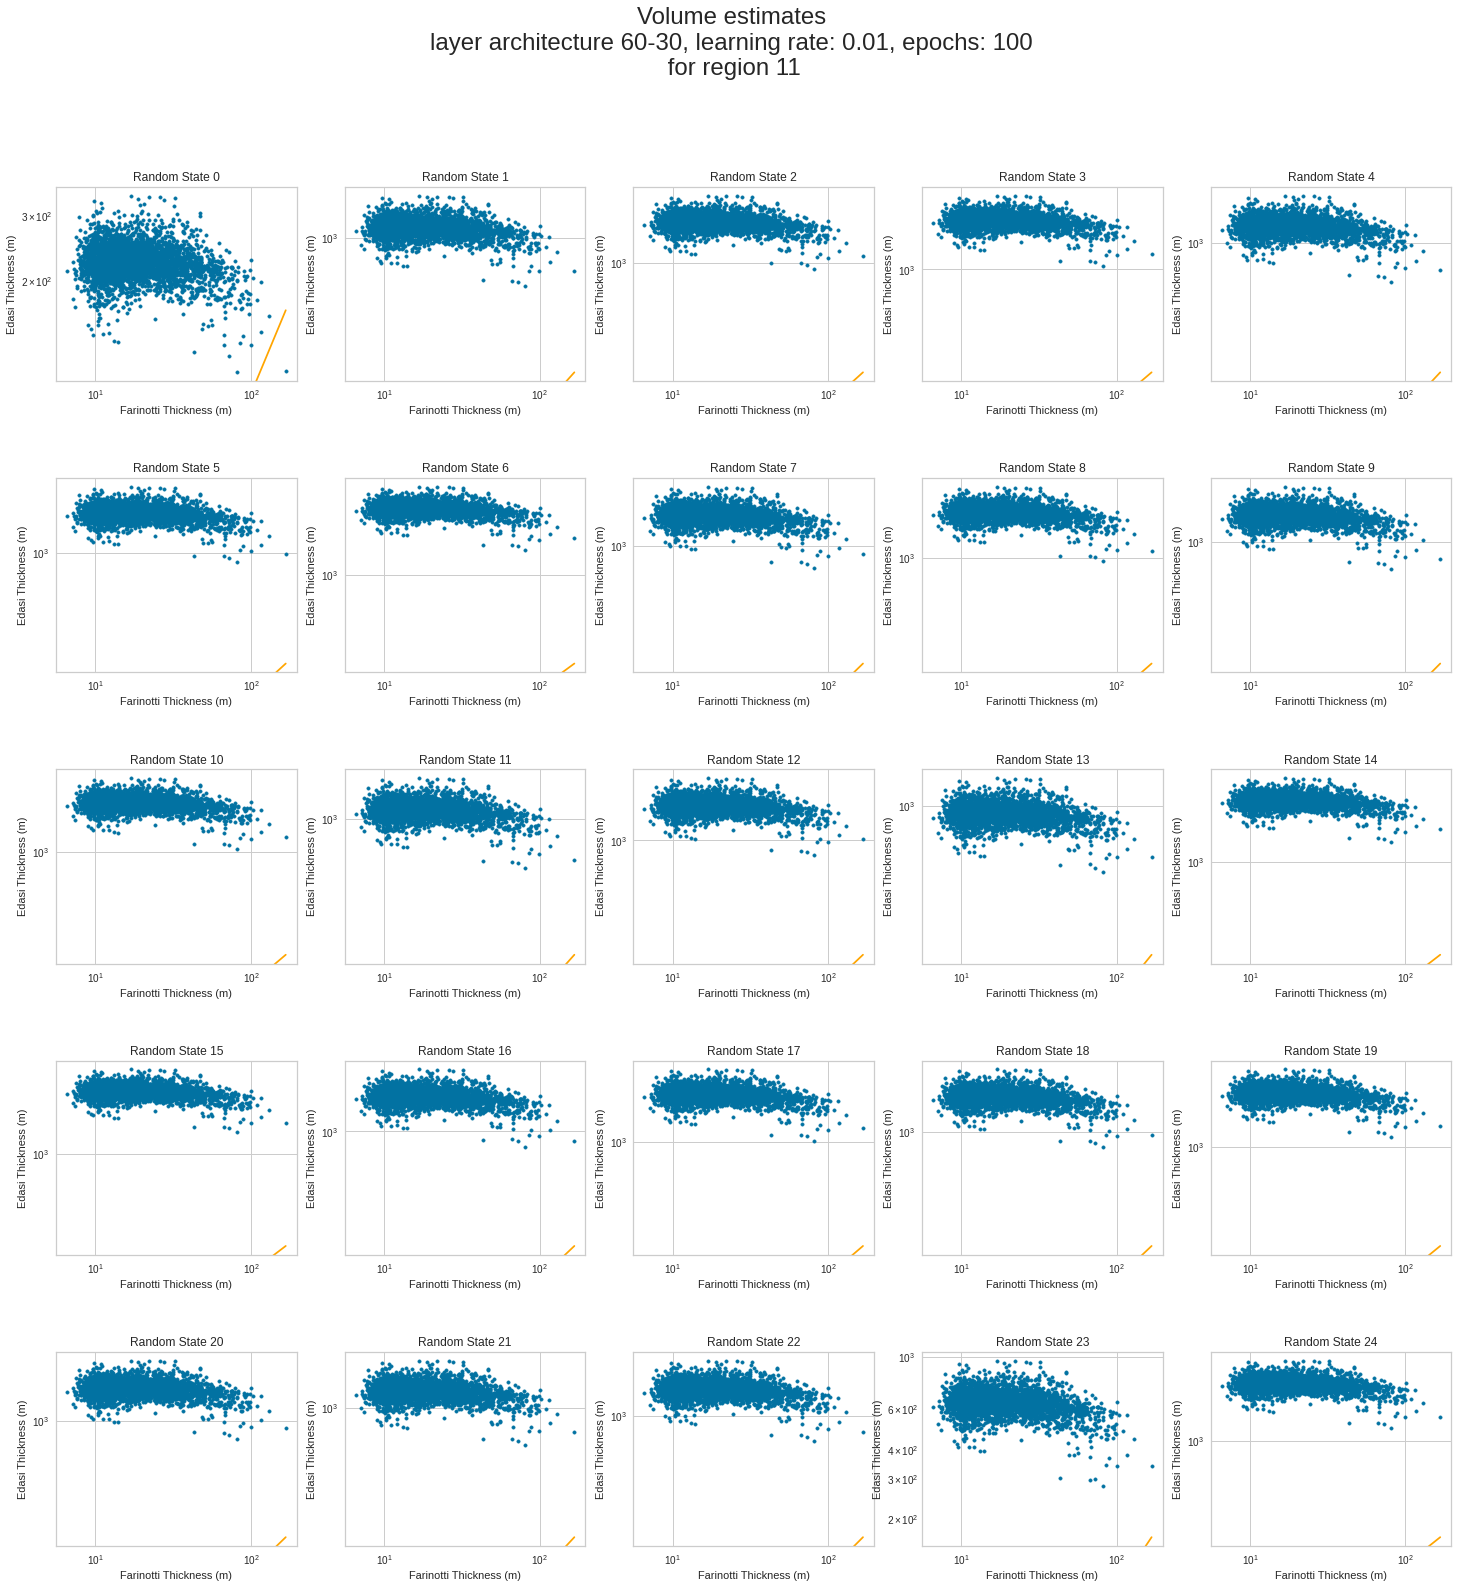

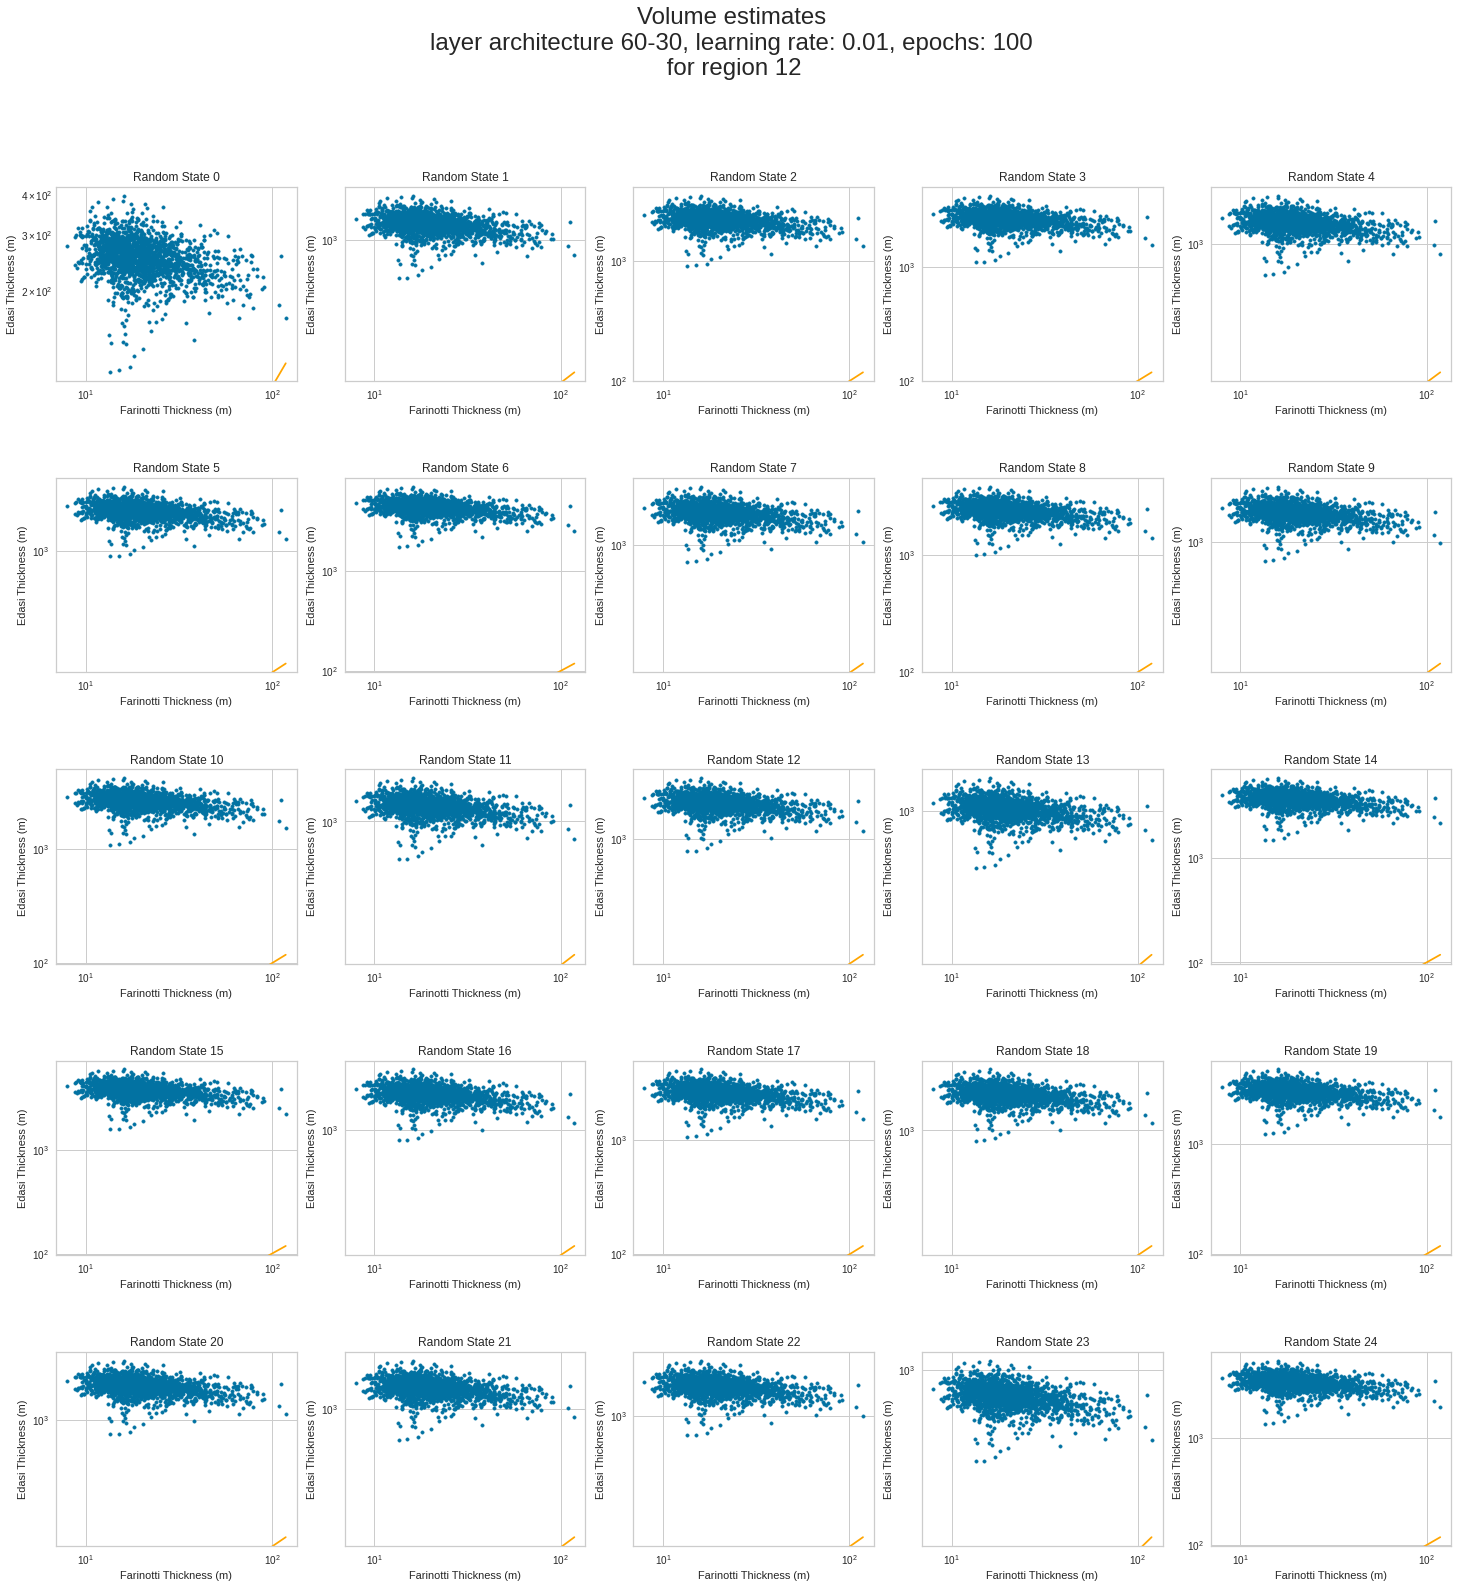

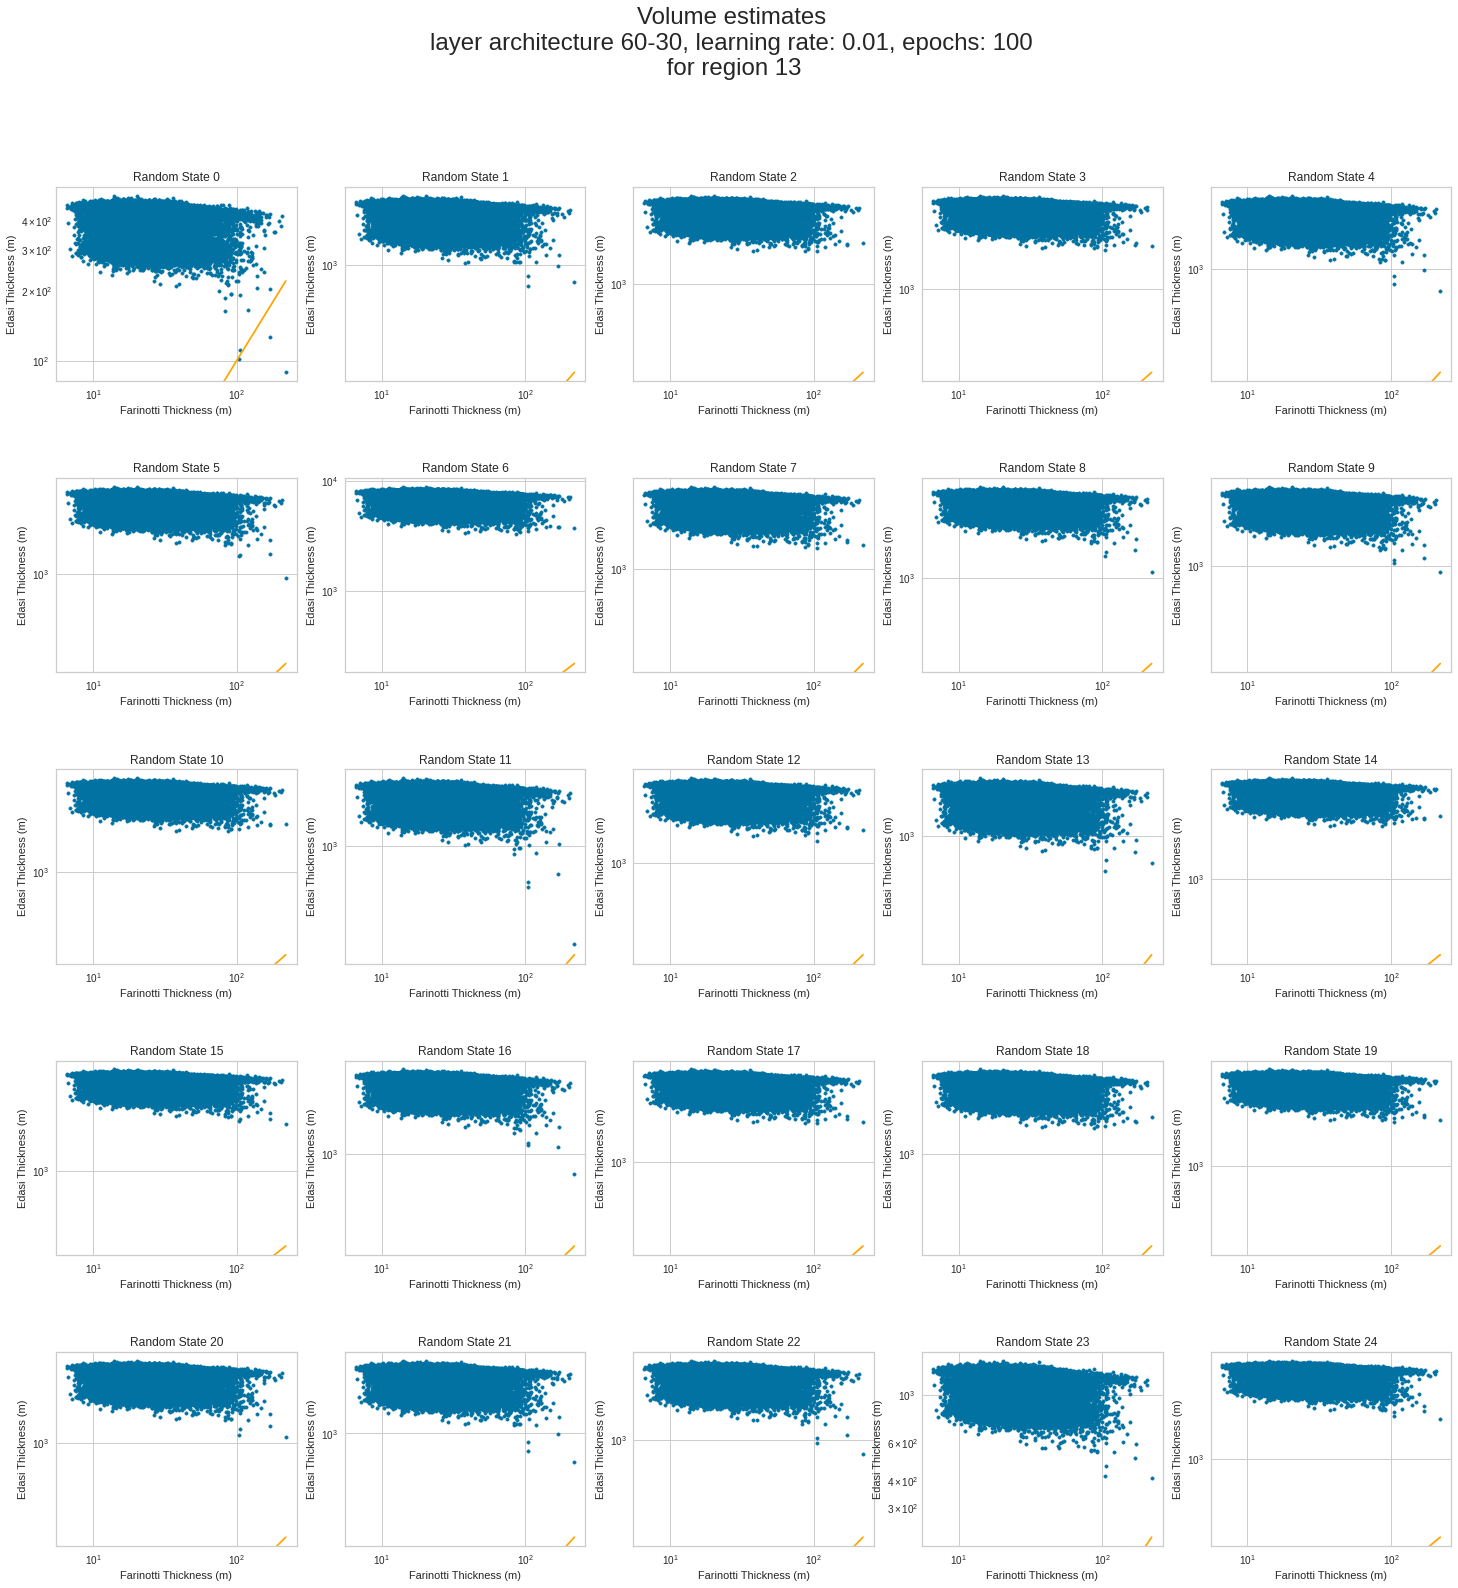

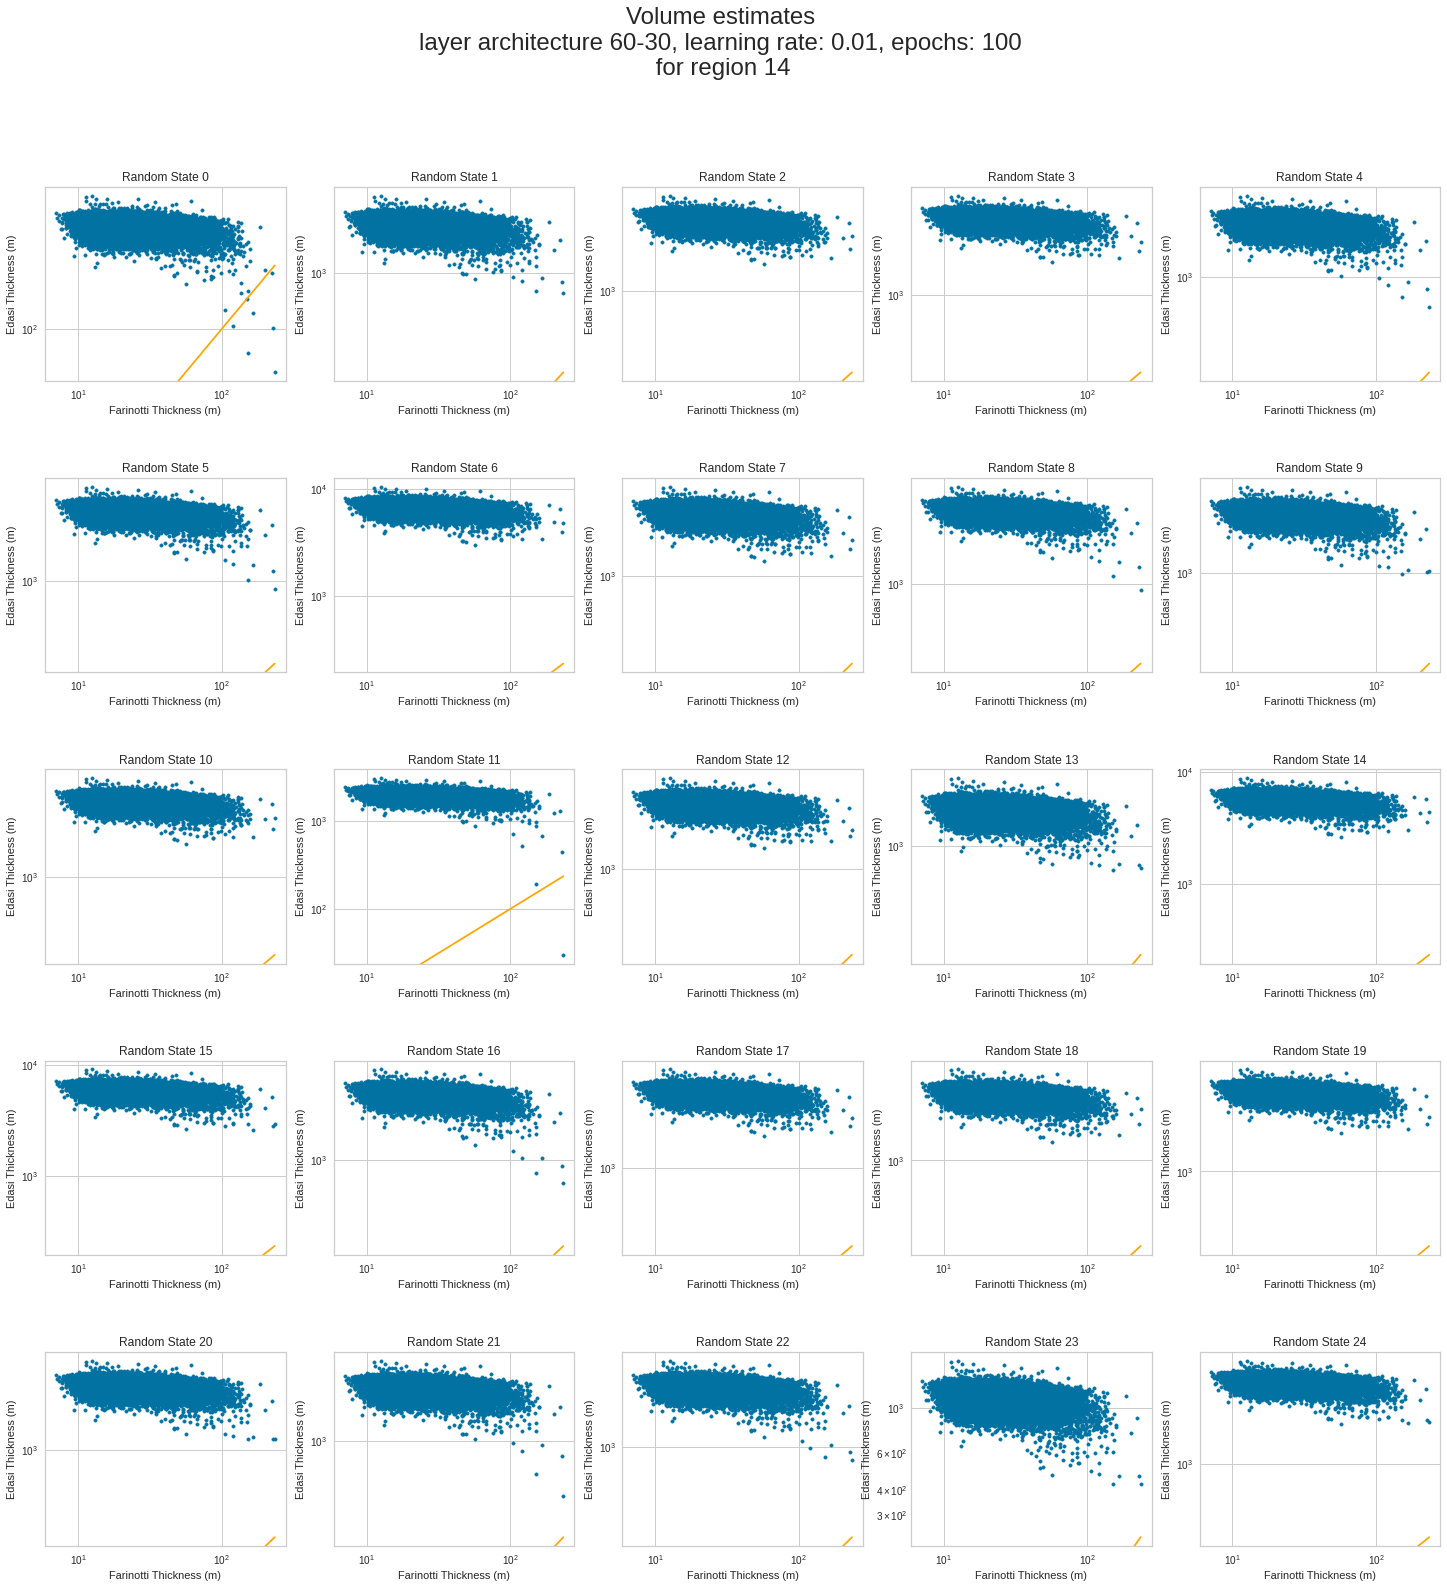

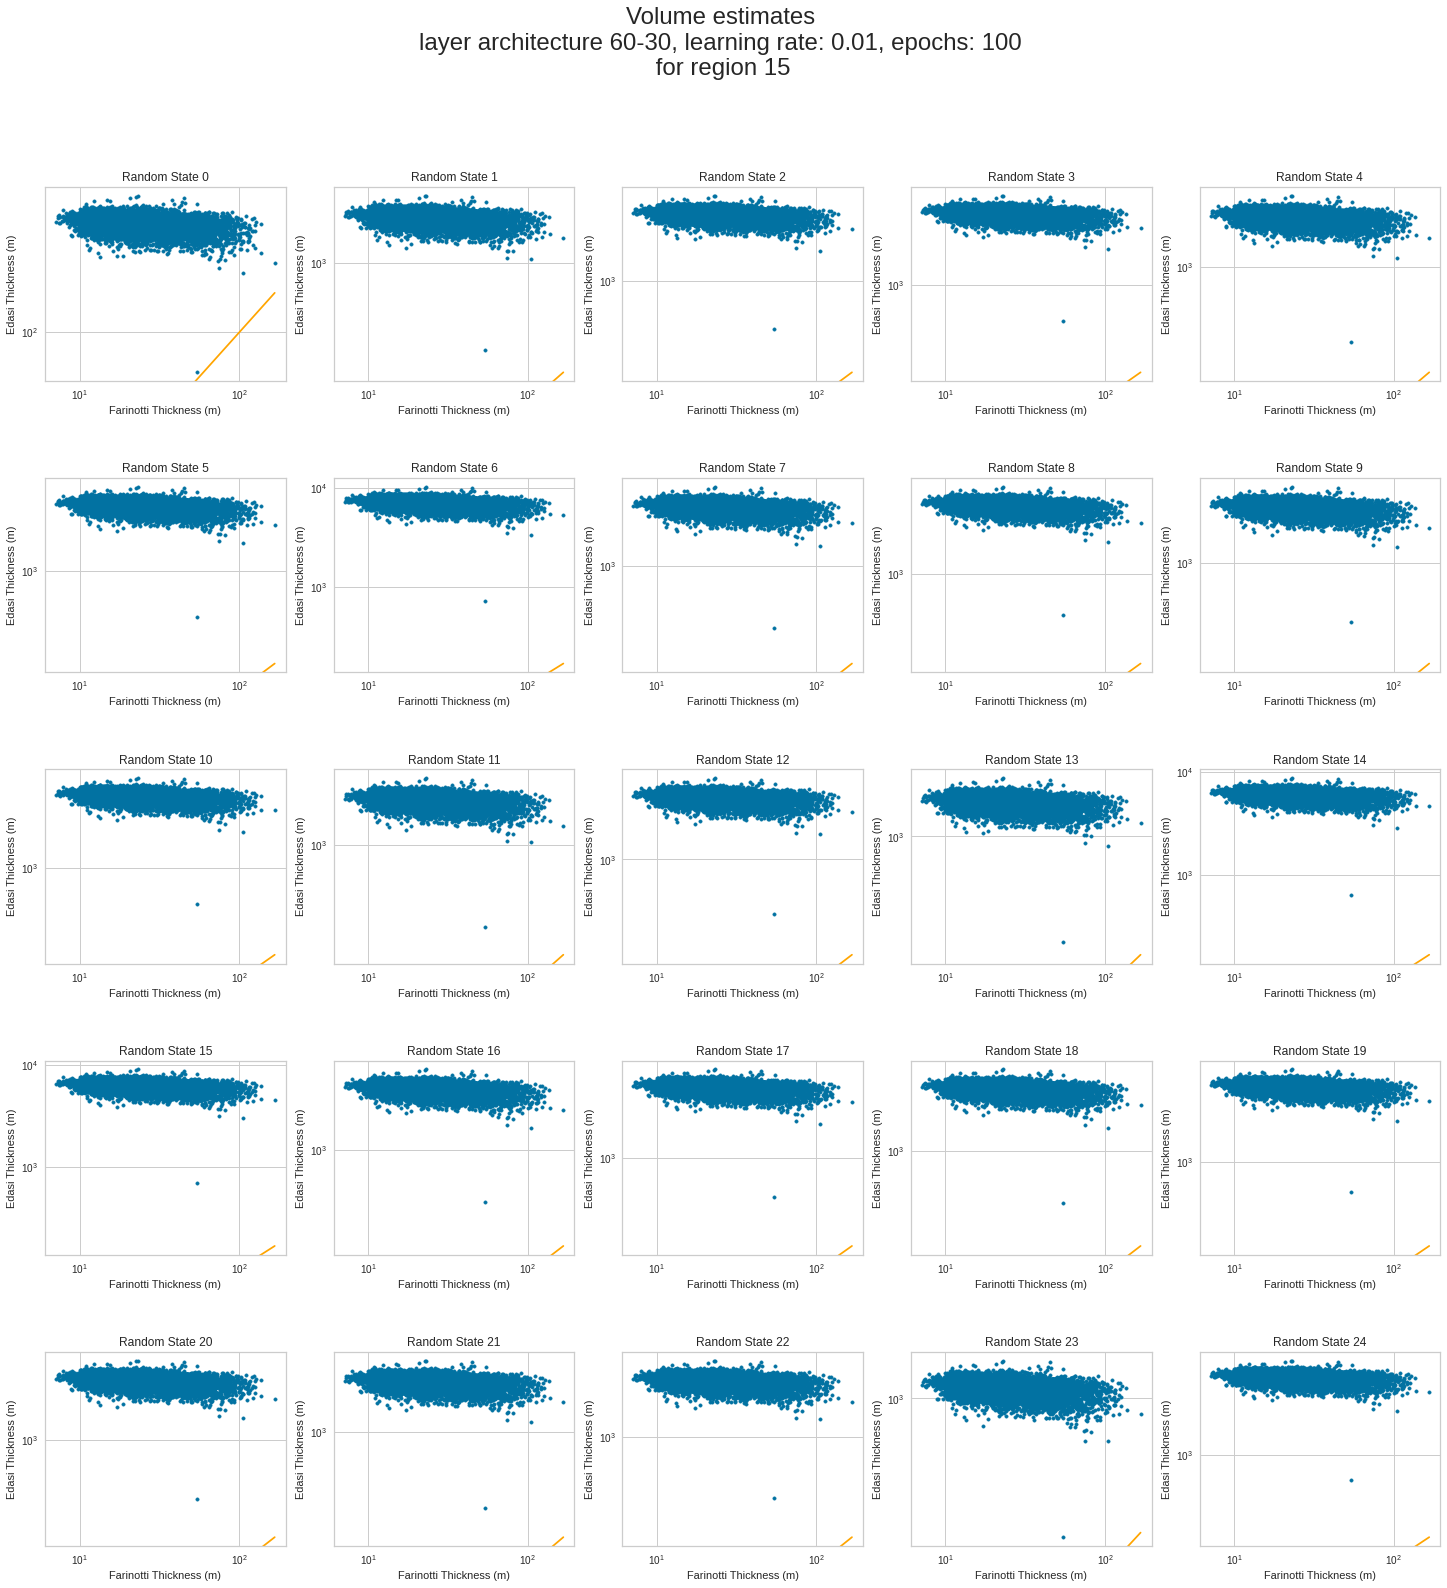

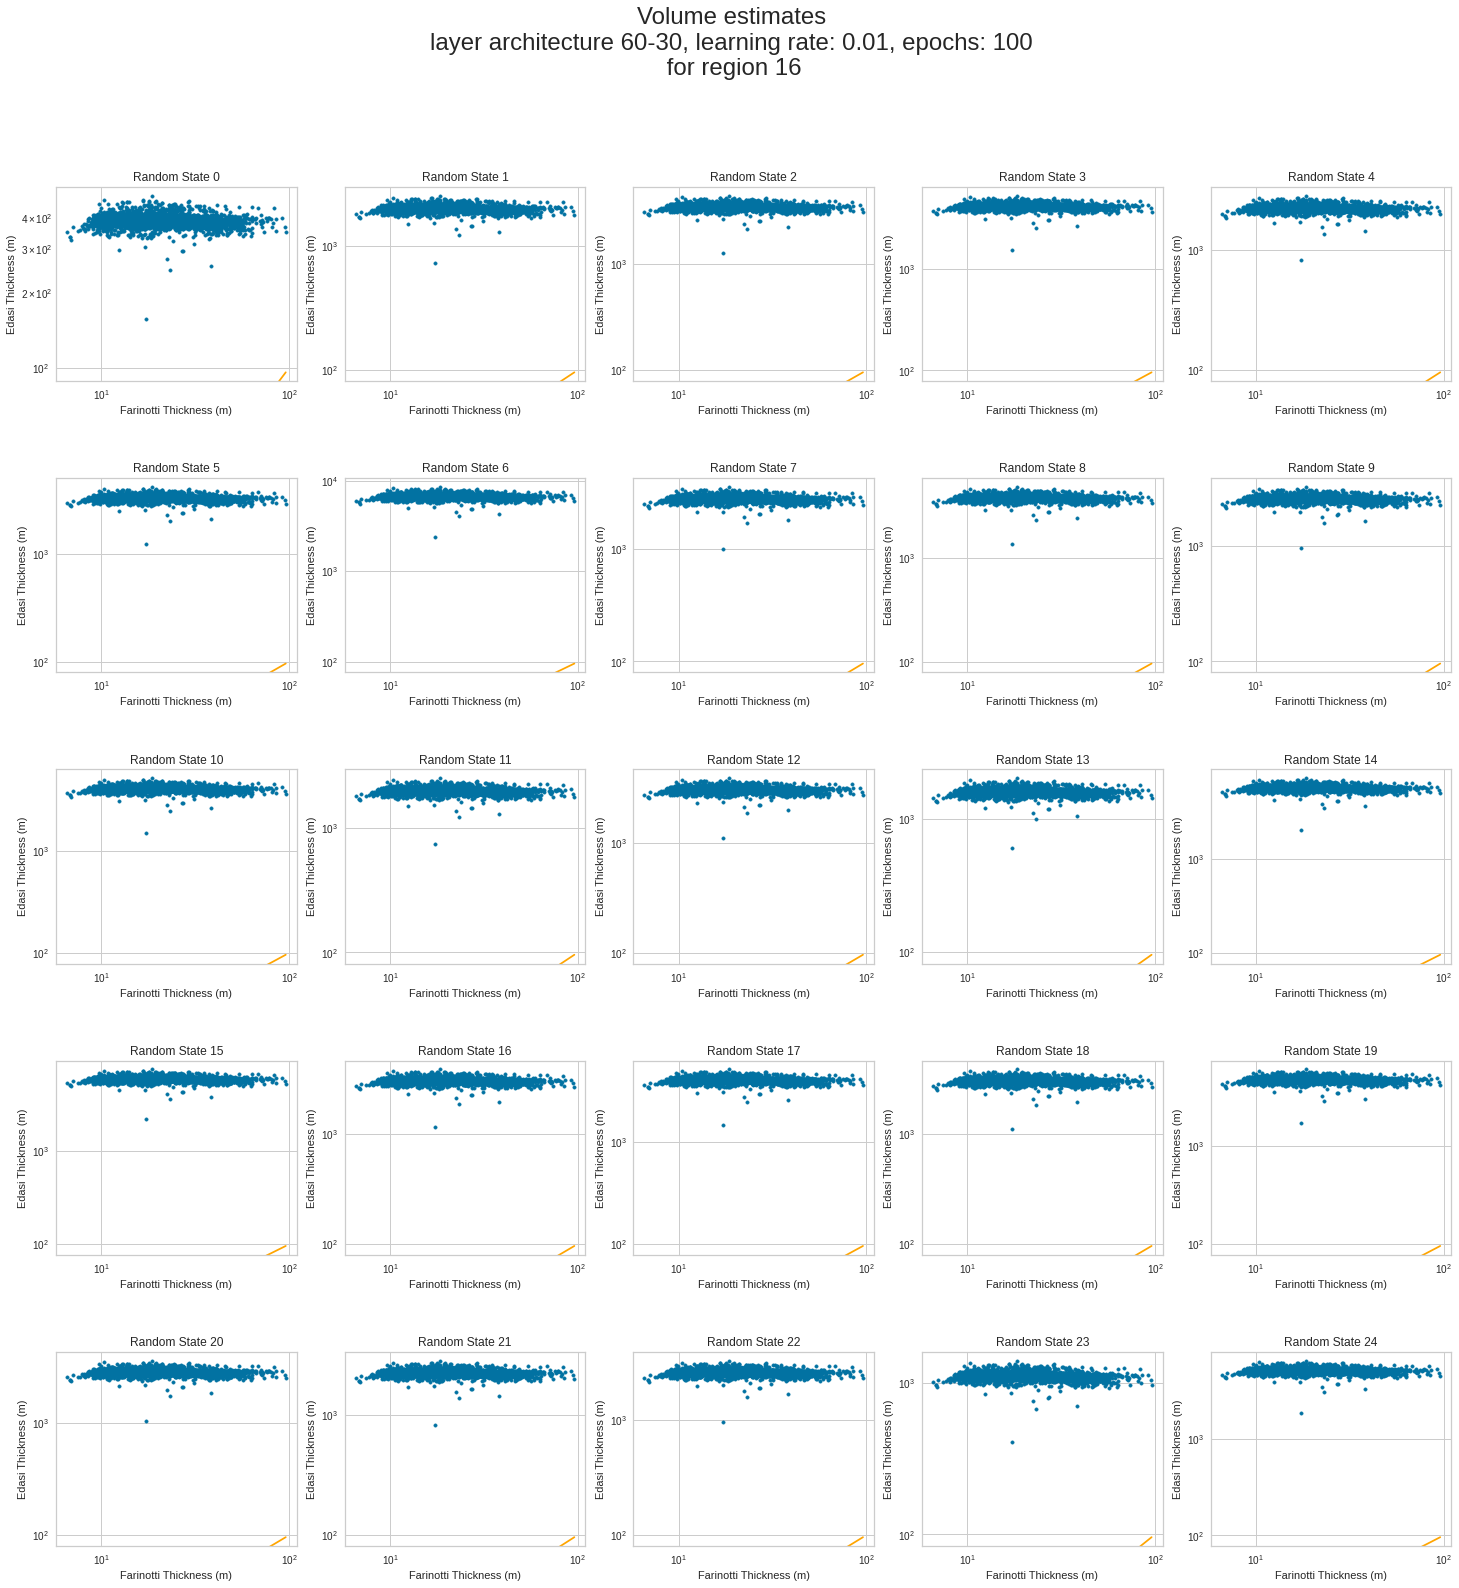

In [ ]:
arch = '60-30'
top_learning_rate = 0.01
epochs = 100
dropout = 1

df9 = gl.data_loader(
    RGI_input = 'y',
    scale = 'g',
    area_scrubber = 'on',
    anomaly_input = 1
# root_dir = '/home/simonhans/data/prethicktor/'
)
# df5 = df5.drop('RGIId', axis = 1)
# df5 = df5.drop('Zmed', axis = 1)
module = 'sm9'
res = 'sr9'
dataset = df9
dataset.name = 'df9'
rootdir = 'saved_models/' + module + '/sm_' + str(arch) + '/'
# print('df length = ' + str(len(ref)))
RGI_for_predictions = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',
]]
# print('RGI length = ' + str(len(RGI_for_predictions)))
dnn_model = {}
RS = range(0,25,1)
df_y = pd.DataFrame()

for region_number in tqdm(range(1,20,1)):
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
        
    dft = ref[ref['region'] == str(region_number)]

    RGI_for_predictions = dft[[
        'CenLat',
        'CenLon',
        'Area',
        'Aspect',
        'Lmax',
        'Slope',
        'Zmin',
        'Zmed',
        'Zmax',
        'Zdelta'
    ]]
#     if region_number != 19:
#         drops = dft[
#             ((dft['region'] == str(region_number)) & (dft['Zmin'] < 0)) |
#             ((dft['region'] == str(region_number)) & (dft['Zmed'] < 0)) |
#             ((dft['region'] == str(region_number)) & (dft['Zmax'] < 0)) |
#             ((dft['region'] == str(region_number)) & (dft['Slope'] < 0)) |
#             ((dft['region'] == str(region_number)) & (dft['Aspect'] < 0))
#         ].index
#         RGI_for_predictions = RGI_for_predictions.drop(drops, axis = 1)
    fig = plt.figure(figsize=(25, 25))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(
        'Volume estimates'
        '\nlayer architecture ' + str(arch) +
        ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs) +
        '\n for region ' + str(region_number)
                 , fontsize=24, y=0.98
                )
    fig.patch.set_facecolor('w')



    for n, rs in (enumerate(RS)):
        ax = plt.subplot(5, 5, n + 1)

        model_name = (
            str(arch) + 
            '_' + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )   

        model_path = (
            rootdir + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )

        dnn_model[model_name] = tf.keras.models.load_model(model_path)

        y = pd.DataFrame(dnn_model[model_name].predict(RGI_for_predictions, verbose = 0))
        df_y = pd.concat([df_y,y], axis = 1)
        plt.scatter(
                x = dft['Farinotti Mean Thickness'],
                y = y,
                marker = '.',
            #             c = dft['cluster'],
            #             cmap = 'viridis',
            #             alpha = 0.5
            #             sharex = True,
            #             sahrey = True
            )
        plt.plot(
            (0,(dft['Farinotti Mean Thickness'].max())),
            (0,(dft['Farinotti Mean Thickness'].max())),
            '-',
            c = 'orange'

        )
#         plt.colorbar()
        plt.xlabel('Farinotti Thickness (m)')
        plt.ylabel('Edasi Thickness (m)')
        ax.set_title('Random State ' +str(rs))
        plt.yscale('log')
        plt.xscale('log')



    #     break
    #     print('y length = ' + str(len(y))) 1)

ref['Edasi Thickness'] = df_y.mean(axis = 1)
ref['VE - VF'] = ref['Edasi Thickness'] - ref['Farinotti Mean Thickness']
ref['VE / VF'] = ref['Edasi Thickness'] / ref['Farinotti Mean Thickness']

ref

In [ ]:
ref['Edasi Thickness'] = df_y.mean(axis = 1)
ref['VE - VF'] = ref['Edasi Thickness'] - ref['Farinotti Mean Thickness']
ref['VE / VF'] = ref['Edasi Thickness'] / ref['Farinotti Mean Thickness']

ref

In [ ]:
ref['VE / VF'].max()

In [ ]:
dft = ref[[
    'Area',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Lmax',
    'Aspect',
]]

for i in dft.columns:
    fig = plt.figure(figsize=(25, 25))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(
        'Volume residuals against ' + str(i) 
                 , fontsize=24, y=0.98
                )
    fig.patch.set_facecolor('w')
    print(i)
    plt.scatter(
        ref[i],
        ref['VE / VF']
    )

In [ ]:
arch = '60-30'
top_learning_rate = 0.01
epochs = 100
dropout = 1

df9 = gl.data_loader(
    RGI_input = 'y',
    scale = 'g',
    area_scrubber = 'on',
    anomaly_input = 1
# root_dir = '/home/simonhans/data/prethicktor/'
)
# df5 = df5.drop('RGIId', axis = 1)
# df5 = df5.drop('Zmed', axis = 1)
module = 'sm9'
res = 'sr9'
dataset = df9
dataset.name = 'df9'
rootdir = 'saved_models/' + module + '/sm_' + str(arch) + '/'


for region_number in range(1,20,1):
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
        
    dft = ref[ref['region'] == str(region_number)]
    RGI_for_predictions = dft[[
        'CenLat',
        'CenLon',
        'Slope',
        'Zmin',
        'Zmed',
        'Zmax',
        'Zdelta',
        'Area',
        'Aspect',
        'Lmax',
    ]]



    df_y = pd.DataFrame()
    thickness = pd.DataFrame()
    dnn_model = {}
    RS = range(0,25,1)
    for rs in tqdm((RS)):
        model_name = (
            str(arch) + 
            '_' + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )   

        model_path = (
            rootdir + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )

        dnn_model[model_name] = tf.keras.models.load_model(model_path)

        y = pd.DataFrame(dnn_model[model_name].predict(RGI_for_predictions, verbose = 0))
        df_y = pd.concat([df_y,y], axis = 1)
    #     break
    #     print('y length = ' + str(len(y))) 1)
# print(df_y)
    thickness = pd.concat([thickness, df_y.mean(axis = 1)])

ref['Edasi Thickness'] = df_y.mean(axis = 1)
ref['VE - VF'] = ref['Edasi Thickness'] - ref['Farinotti Mean Thickness']
ref['VE / VF'] = ref['Edasi Thickness'] / ref['Farinotti Mean Thickness']

ref

In [ ]:
for region_number in tqdm(range(1,20,1)):
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
        
    dft = ref[ref['region'] == str(region_number)]

#     RGI_for_predictions = dft[[
#         'CenLat',
#         'CenLon',
#         'Area',
#         'Aspect',
#         'Lmax',
#         'Slope',
#         'Zmin',
#         'Zmed',
#         'Zmax',
#         'Zdelta'
#     ]]

    fig = plt.figure(figsize=(25, 25))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(
        'Volume estimates using layer architecture ' + str(arch) +
        ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs) +
        '\n for region ' + str(region_number)
                 , fontsize=24, y=0.98
                )
    fig.patch.set_facecolor('w')

    dnn_model = {}
    RS = range(0,25,1)
    for n, rs in (enumerate(RS)):
        ax = plt.subplot(5, 5, n + 1)
        model_name = (
            str(arch) + 
            '_' + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )   

        model_path = (
            rootdir + 
            dataset.name +
            '_' + 
            str(dropout) +
            '_dnn_MULTI_' + 
            str(top_learning_rate) + 
            '_0.2_' +
            str(epochs) + 
            '_' + 
            str(rs)
        )

        dnn_model[model_name] = tf.keras.models.load_model(model_path)


        y = dnn_model[model_name].predict(RGI_for_predictions, verbose = 0)
        # df = pd.concat([df, pd.Series(y.flatten(), name = rs)], axis = 1)

        plt.scatter(
            x = dft['Farinotti Mean Thickness'],
            y = dft['Edasi Thickness'],
            marker = '.',
#             c = dft['cluster'],
#             cmap = 'viridis',
#             alpha = 0.5
#             sharex = True,
#             sahrey = True
        )
        plt.plot(
            (0,(dft['Farinotti Mean Thickness'].max())),
            (0,(dft['Farinotti Mean Thickness'].max())),
            '-',
            c = 'orange'

        )
        plt.colorbar()
        plt.xlabel('Farinotti Mean Thickness (m)')
        plt.ylabel('Edasi Thickness (m)')
        ax.set_title('Random State ' +str(rs))
        plt.yscale('log')
        plt.xscale('log')
#         plt.xlim((0,400))
#         plt.ylim((0,400))
#         plt.savefig(
#             'figs/regional_crossplots/' + str(arch) + '_' +
#             str(top_learning_rate) + '_' +
#             str(epochs) + '_' +
#             str(dropout) + '_' + str(region_number) + '_cluster.eps'
#                    )

#         plt.savefig(
#             'figs/regional_crossplots/' + str(arch) + '_' +
#             str(top_learning_rate) + '_' +
#             str(epochs) + '_' +
#             str(dropout) + '_' + str(region_number) + '_cluster.png'
#        )


In [ ]:
fig = plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(
    'Volume estimates using layer architecture ' + str(arch) +
    ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs)
             , fontsize=24, y=0.98
            )
fig.patch.set_facecolor('w')

for n, cluster_number in enumerate(range(0,2,1)):
    ax = plt.subplot(1, 1, n + 1)
    plt.scatter(
        x = df['Farinotti Thickness'][df['cluster'] == cluster_number],
        y = df['Edasi Thickness'][df['cluster'] == cluster_number],
#         fill = True
#         marker = '.',
    #     c = df['cluster'],
    #     cmap = 'viridis',
    #             alpha = 0.5
    )
    plt.plot(
        (0,(df['Farinotti Thickness'][df['cluster'] == cluster_number].max())),
        (0,(df['Farinotti Thickness'][df['cluster'] == cluster_number].max())),
        '-',
        c = 'orange'

    )
    ax = plt.gca()
    ax.set_xlim([0,(df['Farinotti Thickness'][df['cluster'] == cluster_number].max())])
    ax.set_ylim([0,(df['Farinotti Thickness'][df['cluster'] == cluster_number].max())])

    # plt.colorbar()
    plt.xlabel('Farinotti Thickness (m)')
    plt.ylabel('Edasi Thickness (m)')
    ax.set_title('cluster ' +str(cluster_number))
    plt.yscale('log')
    plt.xscale('log')

In [ ]:
ref

In [ ]:
residuals = pd.DataFrame()

for region_number in tqdm(range(1,20,1)):
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
        
    for cluster in df['cluster'][df['region'] == str(region_number)].unique():
        dft = ref[
            (df['cluster'] == cluster) & 
            (df['region'] == str(region_number))
        ]
        
        residuals = residuals.append(pd.Series(cluster), ignore_index = True)
        residuals.loc[residuals.index[-1], 'region'] = region_number
        residuals.loc[residuals.index[-1], 'cluster'] = cluster
        residuals.loc[residuals.index[-1], 'count'] = len(dft)
        
        residuals.loc[
            residuals.index[-1], 'VE - VF mean'
        ] = dft['VE - VF'].mean()        
        
        residuals.loc[
            residuals.index[-1], 'VE - VF median'
        ] = dft['VE - VF'].median()  
        
        residuals.loc[
            residuals.index[-1], 'VE / VF mean'
        ] = dft['VE / VF'].mean()  
        
        residuals.loc[
            residuals.index[-1], 'VE / VF median'
        ] = dft['VE / VF'].median()  

        residuals.loc[
            residuals.index[-1], 'Area'
        ] = dft['Area'].mean()  
        
        residuals.loc[
            residuals.index[-1], 'Length'
        ] = dft['Lmax'].mean()          
        
        residuals.loc[       
            residuals.index[-1], 'Slope'
        ] = dft['Slope'].mean()          
        
        residuals.loc[        
            residuals.index[-1], 'Zmin'
        ] = dft['Zmin'].mean()          
        
        residuals.loc[
            residuals.index[-1], 'Zmed'
        ] = dft['Zmed'].mean()          
        
        residuals.loc[
            residuals.index[-1], 'Zmax'
        ] = dft['Zmax'].mean()          
        residuals.loc[
            residuals.index[-1], 'Farinotti Thickness'
        ] = dft['Farinotti Thickness'].mean()  
        residuals.loc[
            residuals.index[-1], 'Edasi Thickness'
        ] = dft['Edasi Thickness'].mean()         
        
        
        
residuals['count'] = residuals['count'].astype(int)

residuals['cluster'] = residuals['cluster'].astype(int)
residuals = residuals.drop(0, axis = 1)
cluster_residuals = pd.DataFrame()

# print(residuals)
for cluster in range(0,2,1):
#     print(cluster)
    dfr = residuals[residuals['cluster'] == cluster]
    cluster_residuals = pd.concat([cluster_residuals, pd.Series(cluster, name = 'cluster')])
    cluster_residuals = cluster_residuals.reset_index()
    cluster_residuals = cluster_residuals.drop('index', axis = 1)
    cluster_residuals.loc[
        cluster_residuals.index[-1], 'Farinotti Thickness'
    ] = dfr['Farinotti Thickness'].mean()
    cluster_residuals.loc[
        cluster_residuals.index[-1], 'Edasi Thickness'
    ] = dfr['Edasi Thickness'].mean() 
    
    cluster_residuals.loc[
        cluster_residuals.index[-1], 'VE - VF'
    ] = dfr['VE - VF mean'].mean()        

    cluster_residuals.loc[
        cluster_residuals.index[-1], 'VE / VF'
    ] = dfr['VE / VF mean'].mean()  
    
    cluster_residuals.loc[
        cluster_residuals.index[-1],'Area'
    ] = dfr['Area'].mean()
    
    cluster_residuals.loc[
        cluster_residuals.index[-1],'Length'
    ] = dfr['Length'].mean()
    
    cluster_residuals.loc[
        cluster_residuals.index[-1],'Slope'
    ] = dfr['Slope'].mean()
    
    cluster_residuals.loc[
        cluster_residuals.index[-1],'Zmin'
    ] = dfr['Zmin'].mean()
    
    cluster_residuals.loc[
        cluster_residuals.index[-1],'Zmed'
    ] = dfr['Zmed'].mean()
    
    cluster_residuals.loc[
        cluster_residuals.index[-1],'Zmax'
    ] = dfr['Zmax'].mean()
    
cluster_residuals = cluster_residuals.rename(columns = {
    0:'cluster'
})   
cluster_residuals['cluster'] = cluster_residuals['cluster'].astype(int)
cluster_residuals[
    'Area / Length (km)'] = ((
    cluster_residuals['Area'] * 1e6
        ) / cluster_residuals['Length']) / 1e3
cluster_residuals[
    'Zmax - Zmin (km)'] = ((
    cluster_residuals['Zmax'] - cluster_residuals['Zmin']
)) / 1e3

cluster_residuals = cluster_residuals[[
    'cluster',
    'Area',
    'Length',
    'Slope',
    'VE - VF',
    'VE / VF', 
    'Zmax', 
    'Zmed', 
    'Zmin', 
    'Area / Length (km)',
    'Zmax - Zmin (km)'
]]
cluster_residuals.sort_values('VE / VF')

In [ ]:
dfr = ref[ref['cluster'] == 1]
dfr['Lmax'].min()

In [ ]:
dfy = ref[ref['cluster'] == 0]
dfy['Lmax'].min()

In [ ]:
dft = ref[ref['region'] == '05']
for cluster in dft['cluster'].unique():
    dfy = dft[dft['cluster'] == cluster]
    print('cluster ' + str(cluster) + ' has '+ str(len(dfy)) + ' glaciers')

In [ ]:
residuals = pd.DataFrame()
dfy = ref[ref['region'] == '01']
for cluster_number in range(0,10,1):
    dft = ref[ref['cluster'] == cluster_number]
    cluster = pd.Series(
        int(ref['cluster'][ref['cluster'] == cluster_number].iloc[-1]),
        name = 'cluster'
    )
    residuals = pd.concat([residuals, cluster], axis = 0)
    residuals = residuals.drop(0, axis = 1)
    residuals = residuals.reset_index()
    residuals = residuals.drop('index', axis = 1)
    residuals.loc[residuals.index[-1], 'cluster'] = cluster_number
    residuals.loc[residuals.index[-1], 'VE - VF mean'] = dft['VE - VF'].mean()
    residuals.loc[residuals.index[-1], 'VE - VF median'] = dft['VE - VF'].median()
    residuals.loc[residuals.index[-1], 'VE / VF mean'] = dft['VE / VF'].mean()
    residuals.loc[residuals.index[-1], 'VE / VF median'] = dft['VE / VF'].median()
    residuals.loc[residuals.index[-1], 'count'] = len(dft)
residuals['cluster'] = residuals['cluster'].astype(int)
residuals['count'] = residuals['count'].astype(int)

residuals

In [ ]:
dft

In [ ]:
sum(residuals['count'])

In [ ]:
for cluster_number in range(0,10,1):
    dft = ref[ref['cluster'] == cluster_number]
    cluster = pd.Series(
        int(ref['cluster'][ref['cluster'] == cluster_number].iloc[-1]),
        name = 'cluster'
    )
    residuals = pd.concat([residuals, cluster], axis = 0)
    residuals = residuals.drop(0, axis = 1)
    residuals = residuals.reset_index()
    residuals = residuals.drop('index', axis = 1)
    residuals.loc[residuals.index[-1], 'cluster'] = cluster_number
    residuals.loc[residuals.index[-1], 'VE - VF mean'] = dft['VE - VF'].mean()
    residuals.loc[residuals.index[-1], 'VE - VF median'] = dft['VE - VF'].median()
    residuals.loc[residuals.index[-1], 'VE / VF mean'] = dft['VE / VF'].mean()
    residuals.loc[residuals.index[-1], 'VE / VF median'] = dft['VE / VF'].median()
    residuals.loc[residuals.index[-1], 'count'] = len(dft)
residuals['cluster'] = residuals['cluster'].astype(int)
residuals['count'] = residuals['count'].astype(int)

In [ ]:
ref['VE - VF'].mean()

In [ ]:
for i in range(0,10):
    print('cluster number ' + str(i))
    dft = ref[ref['cluster'] == i]
    print(list(dft['region'].unique()))
    print('')

In [ ]:
cccombo_breaker()